#### Khai báo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import datetime as dt
from datetime import datetime
import os
import itertools
from matplotlib.colors import ListedColormap

from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.feature_selection import mutual_info_regression
from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.cluster import AgglomerativeClustering, DBSCAN
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BTL_KDTM/CODE/data.csv', encoding='unicode_escape')   # nếu chạy trên colab mọi người nhớ điều chỉnh địa chỉ

In [ ]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [ ]:
df.shape

(541909, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [ ]:
df.duplicated().sum()

5268

#### EDA

In [ ]:
def canceled_true(x):
  if 'C' in x:
    return 1      # Nếu có 'C' là đơn hàng bị hủy
  else:
    return 0      # Đơn hàng giao thành công

In [ ]:
df['Canceled'] = df['InvoiceNo'].apply(canceled_true)

In [ ]:
can_df = df['Canceled'].value_counts().reset_index()
can_df['Canceled'] = can_df['Canceled'].replace({0:'Not Cancelled', 1:'Cancelled'})
can_df['percent'] = round((can_df['count'] / (can_df['count'].sum())) * 100, 2)
can_df

Canceled   count  percent
0  Not Cancelled  532621    98.29
1      Cancelled    9288     1.71

In [ ]:
def text_plot(x,y,s):
  for i in range(len(x)):
    plt.text(i, y[i], f"{s[i]:.2f}%", ha = 'center', va = 'bottom', fontsize=12)

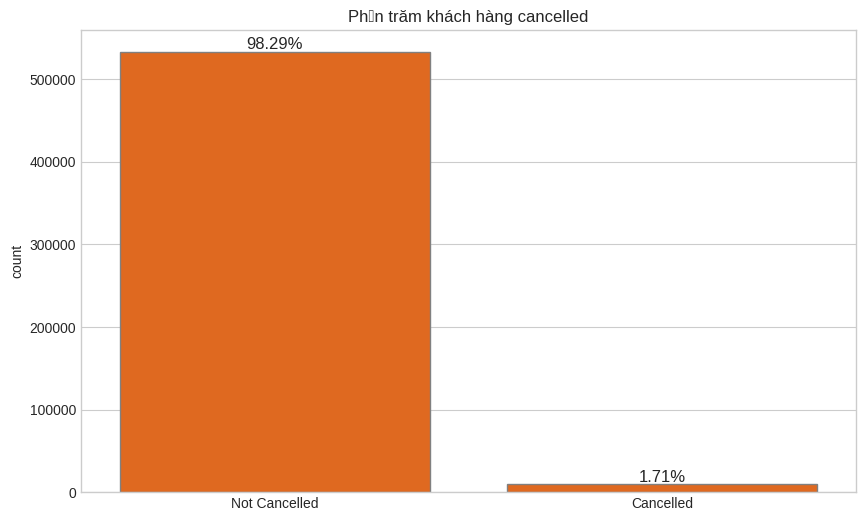

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=can_df, x='Canceled', y='count', color='#ff6200', edgecolor=".5")
text_plot(can_df['Canceled'], can_df['count'], can_df['percent'])
plt.xlabel(None)
plt.title("Phần trăm khách hàng cancelled")
plt.show()

In [ ]:
df['Total Price'] = df['Quantity'] * df['UnitPrice']   # Tạo cột tổng số tiền = tiền 1 sp * số lượng

In [ ]:
print(f'Tổng số khách hàng là: {df.CustomerID.nunique()}')

Tổng số khách hàng là: 4372


In [ ]:
print(f'Tổng số giao dịch là: {df.InvoiceNo.nunique()}')

Tổng số giao dịch là: 25900


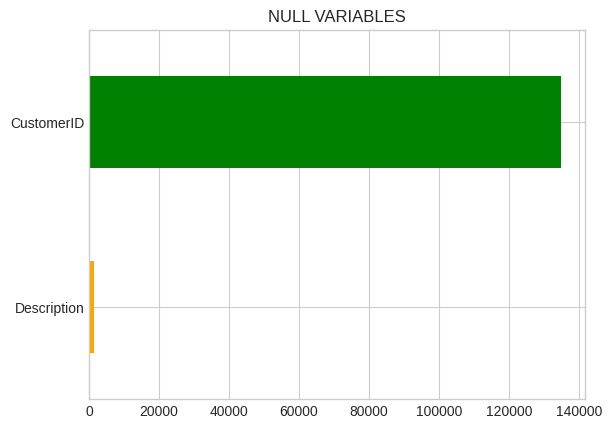

In [ ]:
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data>0]
missing_data.plot(kind='barh', color=['orange', 'green'])
plt.title('NULL VARIABLES');

In [ ]:
df = df.dropna(subset=['CustomerID', 'Description'])

In [ ]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Canceled       0
Total Price    0
dtype: int64

In [ ]:
df.duplicated().sum()

5225

In [ ]:
df = df.drop_duplicates(keep=False)

In [ ]:
df.shape

(396767, 10)

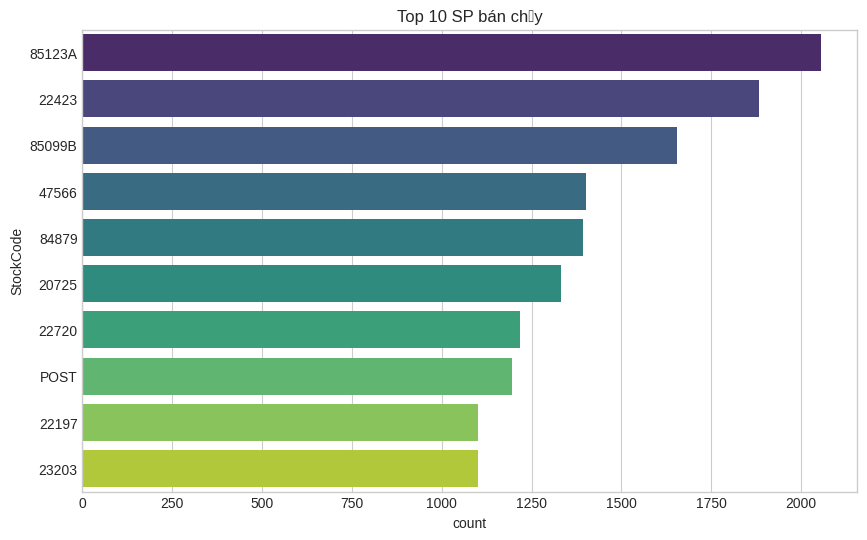

In [ ]:
top_stock = df['StockCode'].value_counts().reset_index().head(10)

plt.rcParams['figure.figsize']=(10,6)
sns.barplot(data = top_stock,
            y = 'StockCode',
            x = 'count',
            palette = 'viridis',
            orient='y')
plt.title('Top 10 SP bán chạy')
plt.show()

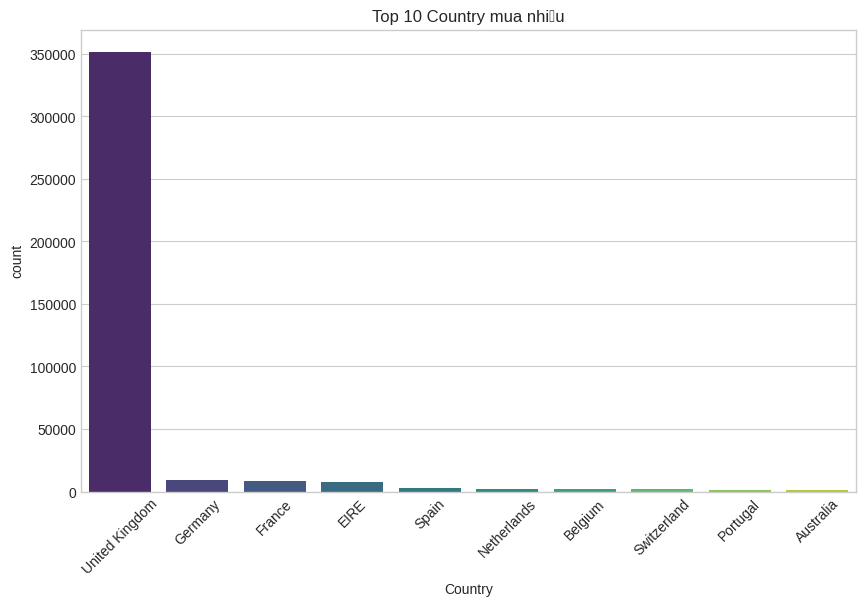

In [ ]:
top_country = df.Country.value_counts().reset_index().head(10)

plt.rcParams['figure.figsize']=(10,6)
sns.barplot(data = top_country,
            x = 'Country',
            y = 'count',
            palette = 'viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Country mua nhiều')
plt.show();

In [ ]:
df = df[df['UnitPrice']>0]            # Loại bỏ các hàng có UnitPrice < 0

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
def get_day_period(hour):
    if 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    elif 18 <= hour < 24:
        return 'evening'
    else:
        return 'night'

In [ ]:
df['hour'] = df['InvoiceDate'].dt.hour
df['hour in day'] = df['InvoiceDate'].dt.hour.apply(get_day_period)
df['day'] = df['InvoiceDate'].dt.day
df['month'] = df['InvoiceDate'].dt.month
df['quarter'] = df['InvoiceDate'].dt.quarter
df['year_quarter'] = df['InvoiceDate'].dt.to_period('Q').dt.strftime('Q%q_%Y')
df['year'] = df['InvoiceDate'].dt.year
df['Day of Week'] = df['InvoiceDate'].dt.day_name().str[:3]


In [ ]:
df.head(5)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Canceled  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom         0   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom         0   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom         0   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom         0   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom         0   

   Total Price  hour hour in day  day  month  quarter year_quarter  year  \
0        15.30     8     morning    1     12        4      Q4_2010  2010   
1        20.34     8     morning    1     12        4      Q4_2010  2010   
2        22.00     8     morning    1     12        4      Q4_2010  2010   
3        20.34     8     morning    1     12        4      Q4_2010  2010   
4        20.34     8     morning    1     12        4      Q4_2010  2010   

  Day of Week  
0         Wed  
1         Wed  
2         Wed  
3         Wed  
4         Wed

In [ ]:
def textplot(x,y,s):
  for i in range(len(x)):
    plt.text(i, y[i], f"{s[i]/1e3:.2f}K", ha = 'center', va = 'bottom', fontsize=12)

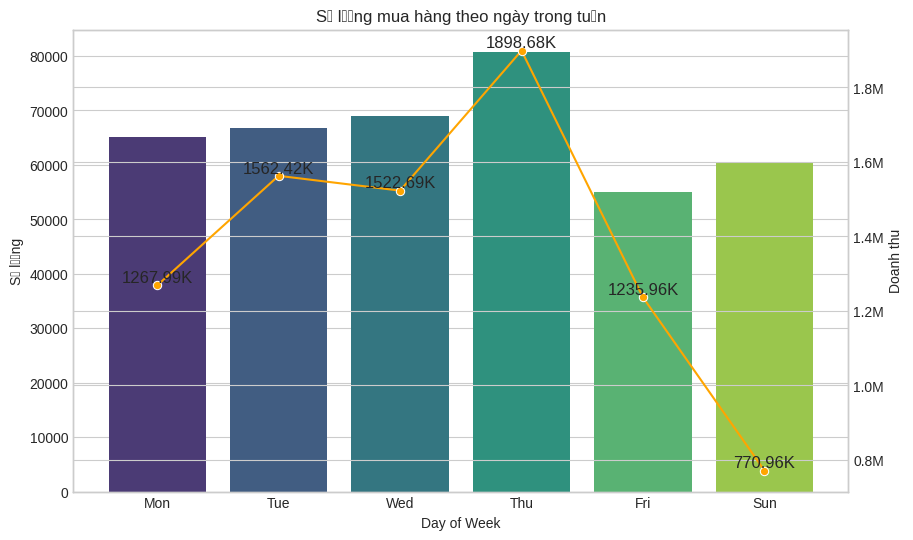

In [ ]:
day_order = df['Day of Week'].value_counts().reset_index()
orders = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sun']
sales_group = df.groupby('Day of Week')['Total Price'].sum().reset_index().set_index('Day of Week').loc[orders].reset_index()

sns.barplot(data=day_order,
            y='count',
            x='Day of Week',
            order=orders,
            palette='viridis')
plt.ylabel('Số lượng')

plt.twinx()
sns.lineplot(data=sales_group, x='Day of Week', y='Total Price', marker='o', color='orange')
textplot(sales_group['Day of Week'], sales_group['Total Price'], sales_group['Total Price'])
plt.ylabel('Doanh thu')
plt.gca().set_yticklabels([f'{x/1e6:.1f}M' for x in plt.gca().get_yticks()])

plt.xlabel(None)
plt.title('Số lượng mua hàng theo ngày trong tuần')
plt.show()

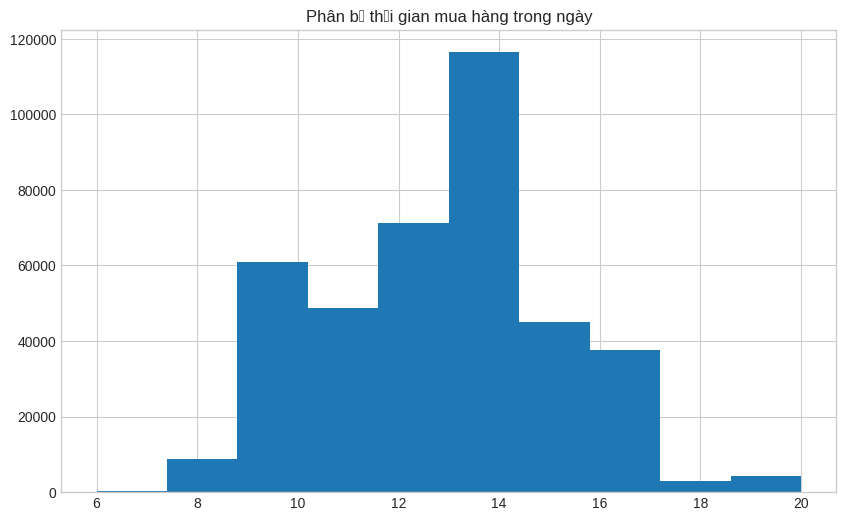

In [ ]:
plt.hist(df['hour'])
plt.title('Phân bố thời gian mua hàng trong ngày');

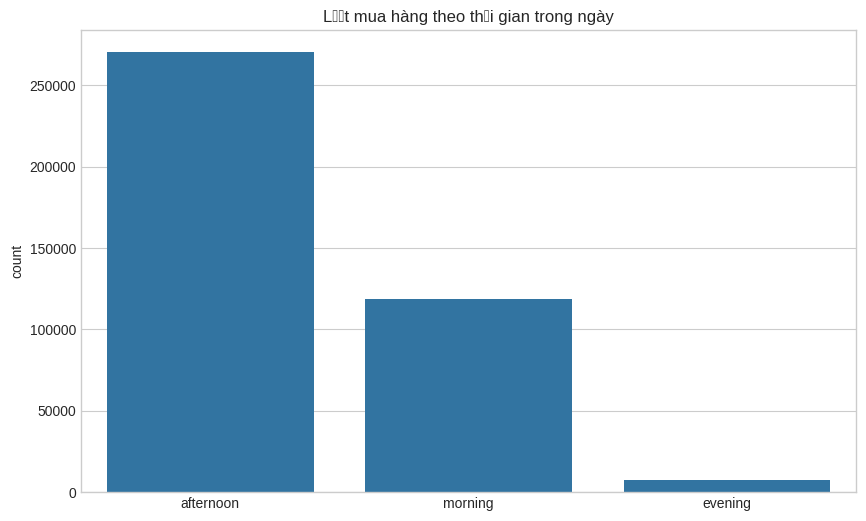

In [ ]:
hour_order = df['hour in day'].value_counts().reset_index()

sns.barplot(hour_order,
            x='hour in day',
            y='count'
            )
plt.xlabel(None)
plt.title('Lượt mua hàng theo thời gian trong ngày')
plt.show()

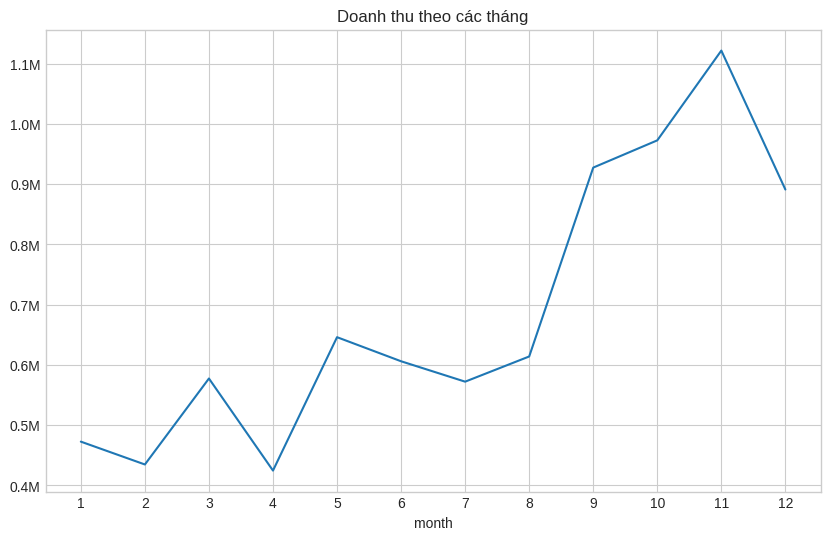

In [ ]:
def millions(x, pos):
    return f'{x/1e6:.1f}M'

formatter = FuncFormatter(millions)

ax = df.groupby('month')['Total Price'].sum().plot()

ax.yaxis.set_major_formatter(formatter)
ax.set_xticks(range(1, 13))

plt.title('Doanh thu theo các tháng')
plt.show()

In [ ]:
grouped_df = df.groupby(['year', 'quarter'])['Total Price'].sum().reset_index()
grouped_df['year_quarter'] = grouped_df['year'].astype(str) + '-Q' + grouped_df['quarter'].astype(str)
grouped_df

year  quarter  Total Price year_quarter
0  2010        4   550298.640      2010-Q4
1  2011        1  1484296.810      2011-Q1
2  2011        2  1676149.791      2011-Q2
3  2011        3  2113183.143      2011-Q3
4  2011        4  2434769.420      2011-Q4

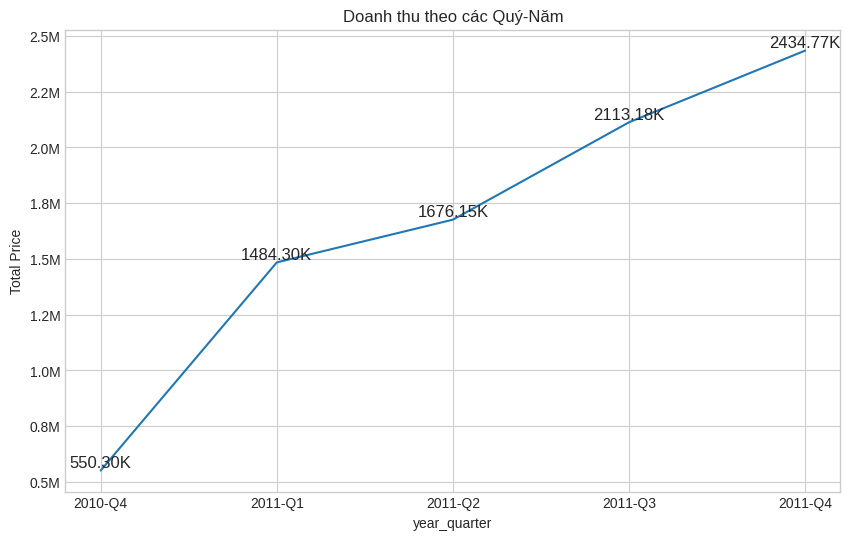

In [ ]:
ax = sns.lineplot(data=grouped_df,
                  x='year_quarter',
                  y='Total Price')

textplot(x=grouped_df['year_quarter'], y=grouped_df['Total Price'], s=grouped_df['Total Price'])
ax.yaxis.set_major_formatter(formatter)

plt.title('Doanh thu theo các Quý-Năm')
plt.show()

#### RFM

In [ ]:
df['CustomerID'] = df['CustomerID'].astype(int)

In [ ]:
# calculate 'Recency'
max_date = pd.to_datetime(df['InvoiceDate'].max())
rfm = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
rfm['recency'] = (max_date - rfm['InvoiceDate']).dt.days           # tính cột khoảng thời gian từ ngày làm mốc đến ngày cuối cùng khách hàng mua hàng

In [ ]:
rfm.drop(columns='InvoiceDate', inplace=True)
rfm

CustomerID  recency
0          12346      325
1          12347        1
2          12348       74
3          12349       18
4          12350      309
...          ...      ...
4366       18280      277
4367       18281      180
4368       18282        7
4369       18283        3
4370       18287       42

[4371 rows x 2 columns]

In [ ]:
# Frequency
frq = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index().rename(columns={'InvoiceNo':'frequency'})             # tính tần suất mua hàng của khách hàng
total_product_purchased = df.groupby('CustomerID')['Quantity'].sum().reset_index().rename(columns={'Quantity':'total_product_purchased'})   # tính tổng số sản phẩm mà khách hàng đã mua
rfm = rfm.merge(frq, how='inner', on='CustomerID')
rfm = rfm.merge(total_product_purchased, how='inner', on='CustomerID')
rfm.head()

CustomerID  recency  frequency  total_product_purchased
0       12346      325          2                        0
1       12347        1          7                     2458
2       12348       74          4                     2341
3       12349       18          1                      631
4       12350      309          1                      197

In [ ]:
# Monetary
value = df.groupby('CustomerID')['Total Price'].sum().reset_index().rename(columns={'Total Price':'monetary'})        # tổng số tiền mà khách hàng đã chi
avg_spend_a_trans = value.merge(frq, how='inner', on='CustomerID')
avg_spend_a_trans['avg_spend_a_trans'] = avg_spend_a_trans['monetary'] / avg_spend_a_trans['frequency']               # trung bình số tiền mà khách hàng chi trên 1 giao dich
rfm = rfm.merge(value, how='inner', on='CustomerID')
rfm = rfm.merge(avg_spend_a_trans[['CustomerID', 'avg_spend_a_trans']], on='CustomerID')
rfm.head()

CustomerID  recency  frequency  total_product_purchased  monetary  \
0       12346      325          2                        0      0.00   
1       12347        1          7                     2458   4310.00   
2       12348       74          4                     2341   1797.24   
3       12349       18          1                      631   1757.55   
4       12350      309          1                      197    334.40   

   avg_spend_a_trans  
0           0.000000  
1         615.714286  
2         449.310000  
3        1757.550000  
4         334.400000

In [ ]:
# tính số sản phẩm khác nhau mà khách hàng đã mua (thể hiện sự mua sắm các sản phẩm riêng biệt của khách hàng)
unique_product_purchased = df.groupby('CustomerID')['StockCode'].nunique().reset_index().rename(columns={'StockCode':'#_unique_product_purchased'})
rfm = rfm.merge(unique_product_purchased, how='inner', on='CustomerID')
rfm.head()

CustomerID  recency  frequency  total_product_purchased  monetary  \
0       12346      325          2                        0      0.00   
1       12347        1          7                     2458   4310.00   
2       12348       74          4                     2341   1797.24   
3       12349       18          1                      631   1757.55   
4       12350      309          1                      197    334.40   

   avg_spend_a_trans  #_unique_product_purchased  
0           0.000000                           1  
1         615.714286                         103  
2         449.310000                          22  
3        1757.550000                          73  
4         334.400000                          17

In [ ]:
df['Day of Week'] = df['Day of Week'].replace({'Mon':2, 'Tue':3, 'Wed':4, 'Thu':5, 'Fri':6, 'Sun':8})

In [ ]:
freq_hour_buy = df.groupby(['CustomerID', 'hour']).size().reset_index(name='Count').rename(columns={'hour': 'freq_hour_buy'})
freq_hour_buy = freq_hour_buy.loc[freq_hour_buy.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'freq_hour_buy']]        # tính thời gian nào trong ngày khách hàng thường mua
freq_day_buy = df.groupby(['CustomerID', 'Day of Week']).size().reset_index(name='Count').rename(columns={'Day of Week': 'freq_day_buy'})
freq_day_buy = freq_day_buy.loc[freq_day_buy.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'freq_day_buy']]           # thời gian nào trong tuần khách hàng thường mua
rfm = rfm.merge(freq_hour_buy, how='inner', on='CustomerID')
rfm = rfm.merge(freq_day_buy, how='inner', on='CustomerID')
rfm.head()

CustomerID  recency  frequency  total_product_purchased  monetary  \
0       12346      325          2                        0      0.00   
1       12347        1          7                     2458   4310.00   
2       12348       74          4                     2341   1797.24   
3       12349       18          1                      631   1757.55   
4       12350      309          1                      197    334.40   

   avg_spend_a_trans  #_unique_product_purchased  freq_hour_buy  freq_day_buy  
0           0.000000                           1             10             3  
1         615.714286                         103             14             3  
2         449.310000                          22             19             5  
3        1757.550000                          73              9             2  
4         334.400000                          17             16             4

In [ ]:
# vì số lượng lớn dữ liệu khách hàng đến từ Anh Quốc
customer_nation = df.groupby('CustomerID')['Country'].agg(pd.Series.mode).reset_index()
customer_nation['is_uk'] = customer_nation['Country'].apply(lambda x: 1 if x == 'United Kingdom' else 0)
customer_nation.drop(columns='Country', inplace=True)
rfm = rfm.merge(customer_nation, how='inner', on='CustomerID')
rfm.head()

CustomerID  recency  frequency  total_product_purchased  monetary  \
0       12346      325          2                        0      0.00   
1       12347        1          7                     2458   4310.00   
2       12348       74          4                     2341   1797.24   
3       12349       18          1                      631   1757.55   
4       12350      309          1                      197    334.40   

   avg_spend_a_trans  #_unique_product_purchased  freq_hour_buy  freq_day_buy  \
0           0.000000                           1             10             3   
1         615.714286                         103             14             3   
2         449.310000                          22             19             5   
3        1757.550000                          73              9             2   
4         334.400000                          17             16             4   

   is_uk  
0      1  
1      0  
2      0  
3      0  
4      0

In [ ]:
# tính số đơn hàng mà khách hàng đã hủy
df1 = df[df['Canceled']==1]
cancelled_customer = df1.groupby('CustomerID')['InvoiceNo'].nunique().reset_index().rename(columns={'InvoiceNo':'#_cancelled'})
rfm = rfm.merge(cancelled_customer, how='left', on='CustomerID')
rfm.fillna(0, inplace=True)
rfm.head()

CustomerID  recency  frequency  total_product_purchased  monetary  \
0       12346      325          2                        0      0.00   
1       12347        1          7                     2458   4310.00   
2       12348       74          4                     2341   1797.24   
3       12349       18          1                      631   1757.55   
4       12350      309          1                      197    334.40   

   avg_spend_a_trans  #_unique_product_purchased  freq_hour_buy  freq_day_buy  \
0           0.000000                           1             10             3   
1         615.714286                         103             14             3   
2         449.310000                          22             19             5   
3        1757.550000                          73              9             2   
4         334.400000                          17             16             4   

   is_uk  #_cancelled  
0      1          1.0  
1      0          0.0  
2      0          0.0  
3      0          0.0  
4      0          0.0

In [ ]:
rfm['CustomerID'] = rfm['CustomerID'].astype(str)

In [ ]:
rfm.dtypes

CustomerID                     object
recency                         int64
frequency                       int64
total_product_purchased         int64
monetary                      float64
avg_spend_a_trans             float64
#_unique_product_purchased      int64
freq_hour_buy                   int32
freq_day_buy                    int64
is_uk                           int64
#_cancelled                   float64
dtype: object

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=15, contamination=0.05)
rfm['score1'] = lof.fit_predict(rfm)

rfm['is_outlier1'] = [1 if x == -1 else 0 for x in rfm['score1']]

In [ ]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.05, random_state=42)

rfm['score2'] = iso.fit_predict(rfm.iloc[:, 1:].to_numpy())
rfm['is_outlier2'] = [1 if x == -1 else 0 for x in rfm['score2']]

In [ ]:
from sklearn.svm import OneClassSVM

ocsvm = OneClassSVM(kernel="rbf", gamma=0.1, nu=0.1)
rfm['score3'] = ocsvm.fit_predict(rfm.iloc[:,1:])
rfm['is_outlier3'] = [1 if x == -1 else 0 for x in rfm['score3']]

In [ ]:
print(rfm['is_outlier1'].value_counts(normalize=True)*100)
print(rfm['is_outlier2'].value_counts(normalize=True)*100)
print(rfm['is_outlier3'].value_counts(normalize=True)*100)


is_outlier1
0    94.989705
1     5.010295
Name: proportion, dtype: float64
is_outlier2
0    94.989705
1     5.010295
Name: proportion, dtype: float64
is_outlier3
1    57.835736
0    42.164264
Name: proportion, dtype: float64


In [ ]:
outlier_data = rfm[rfm['is_outlier1']==1]
rfm_cleaned = rfm[rfm['is_outlier1']==0]
rfm_cleaned.drop(columns=['score1', 'score2', 'score3', 'is_outlier1', 'is_outlier2', 'is_outlier3'], inplace=True)
outlier_data.drop(columns=['score1', 'score2', 'score3', 'is_outlier1', 'is_outlier2', 'is_outlier3'], inplace=True)
rfm_cleaned.head()

CustomerID  recency  frequency  total_product_purchased  monetary  \
0      12346      325          2                        0      0.00   
1      12347        1          7                     2458   4310.00   
4      12350      309          1                      197    334.40   
5      12352       35         11                      470   1545.41   
6      12353      203          1                       20     89.00   

   avg_spend_a_trans  #_unique_product_purchased  freq_hour_buy  freq_day_buy  \
0           0.000000                           1             10             3   
1         615.714286                         103             14             3   
4         334.400000                          17             16             4   
5         140.491818                          59             14             3   
6          89.000000                           4             17             5   

   is_uk  #_cancelled  
0      1          1.0  
1      0          0.0  
4      0          0.0  
5      0          3.0  
6      0          0.0

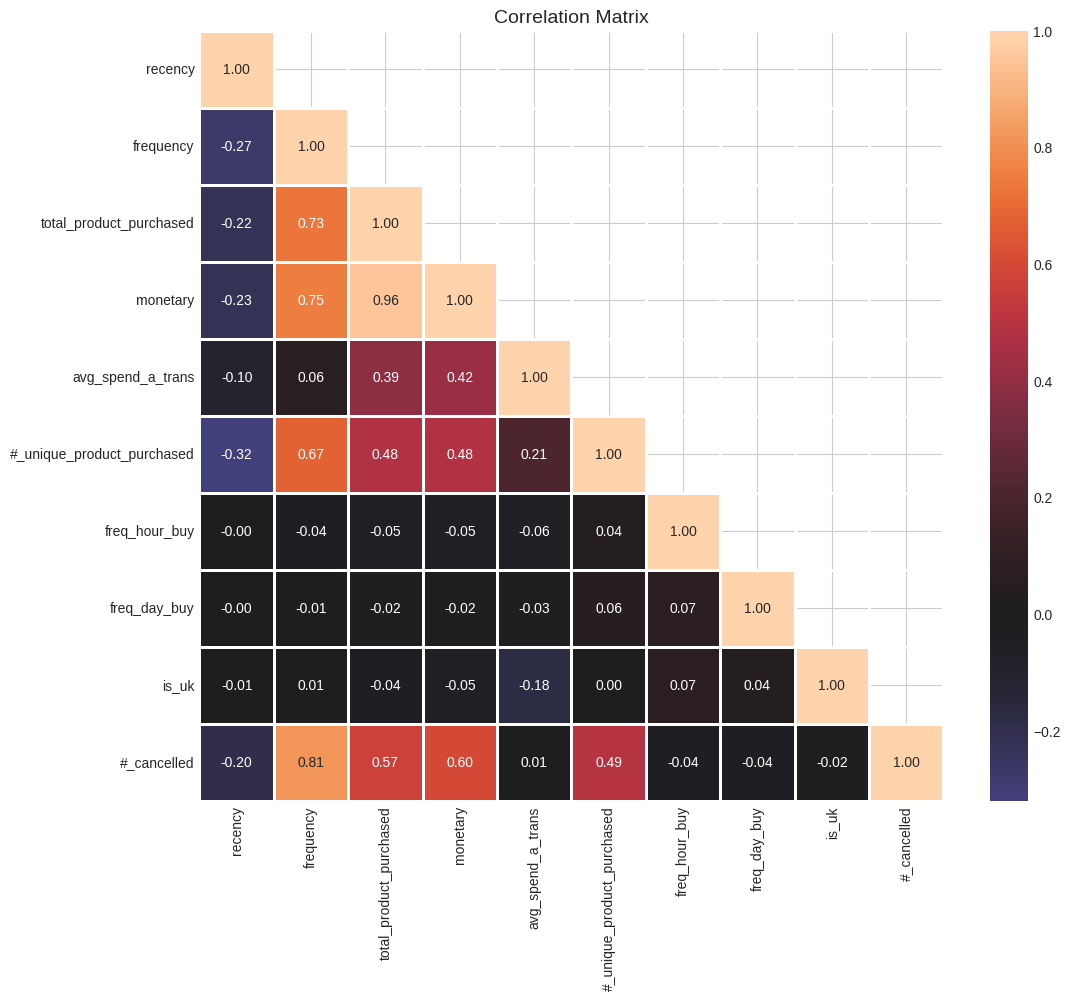

In [ ]:
corr = rfm_cleaned.drop(columns='CustomerID').corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, annot=True, center=0, fmt='.2f', linewidths=2)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

### Giải thích các biến

---

*   CustomerID: ID của mỗi khách hàng (mỗi khách hàng chỉ có 1 mã)
*   recency: Số ngày đã trôi qua từ lần mua cuối cùng của khách hàng (so với hiện tại)
*   frequency: tần suất mua hàng của khách hàng
*   total_product_purchased: tổng số lượng sản phẩm đã được khách hàng mua trong tất cả các giao dịch
*   monetary: Tổng số tiền khách hàng đã mua trong tất cả các giao dịch
*   avg_spend_a_trans: giá trị trung bình các giao dịch của khách hàng (= tổng số tiền / tổng số giao dịch)
*   #_unique_product_purchased: Số lượng sản phẩm khác nhau mà khách hàng đã mua
*   freq_hour_buy: Giờ trong ngày khách hàng thích mua sắm hơn (theo mức 24h)
*   freq_day_buy: Ngày trong tuần khách hàng thích mua sắm hơn (VD: 2: thứ 2, 3:thứ 3, ..., 8: CN)
*   is_uk: biến cho biết cửa hàng ở Anh Quốc không?(1: Có, 2: Không)
*   #_cancelled: Tổng số đơn hàng mà khách hàng đã hủy.




In [ ]:
rfm_cleaned.head()

CustomerID  recency  frequency  total_product_purchased  monetary  \
0      12346      325          2                        0      0.00   
1      12347        1          7                     2458   4310.00   
4      12350      309          1                      197    334.40   
5      12352       35         11                      470   1545.41   
6      12353      203          1                       20     89.00   

   avg_spend_a_trans  #_unique_product_purchased  freq_hour_buy  freq_day_buy  \
0           0.000000                           1             10             3   
1         615.714286                         103             14             3   
4         334.400000                          17             16             4   
5         140.491818                          59             14             3   
6          89.000000                           4             17             5   

   is_uk  #_cancelled  
0      1          1.0  
1      0          0.0  
4      0          0.0  
5      0          3.0  
6      0          0.0

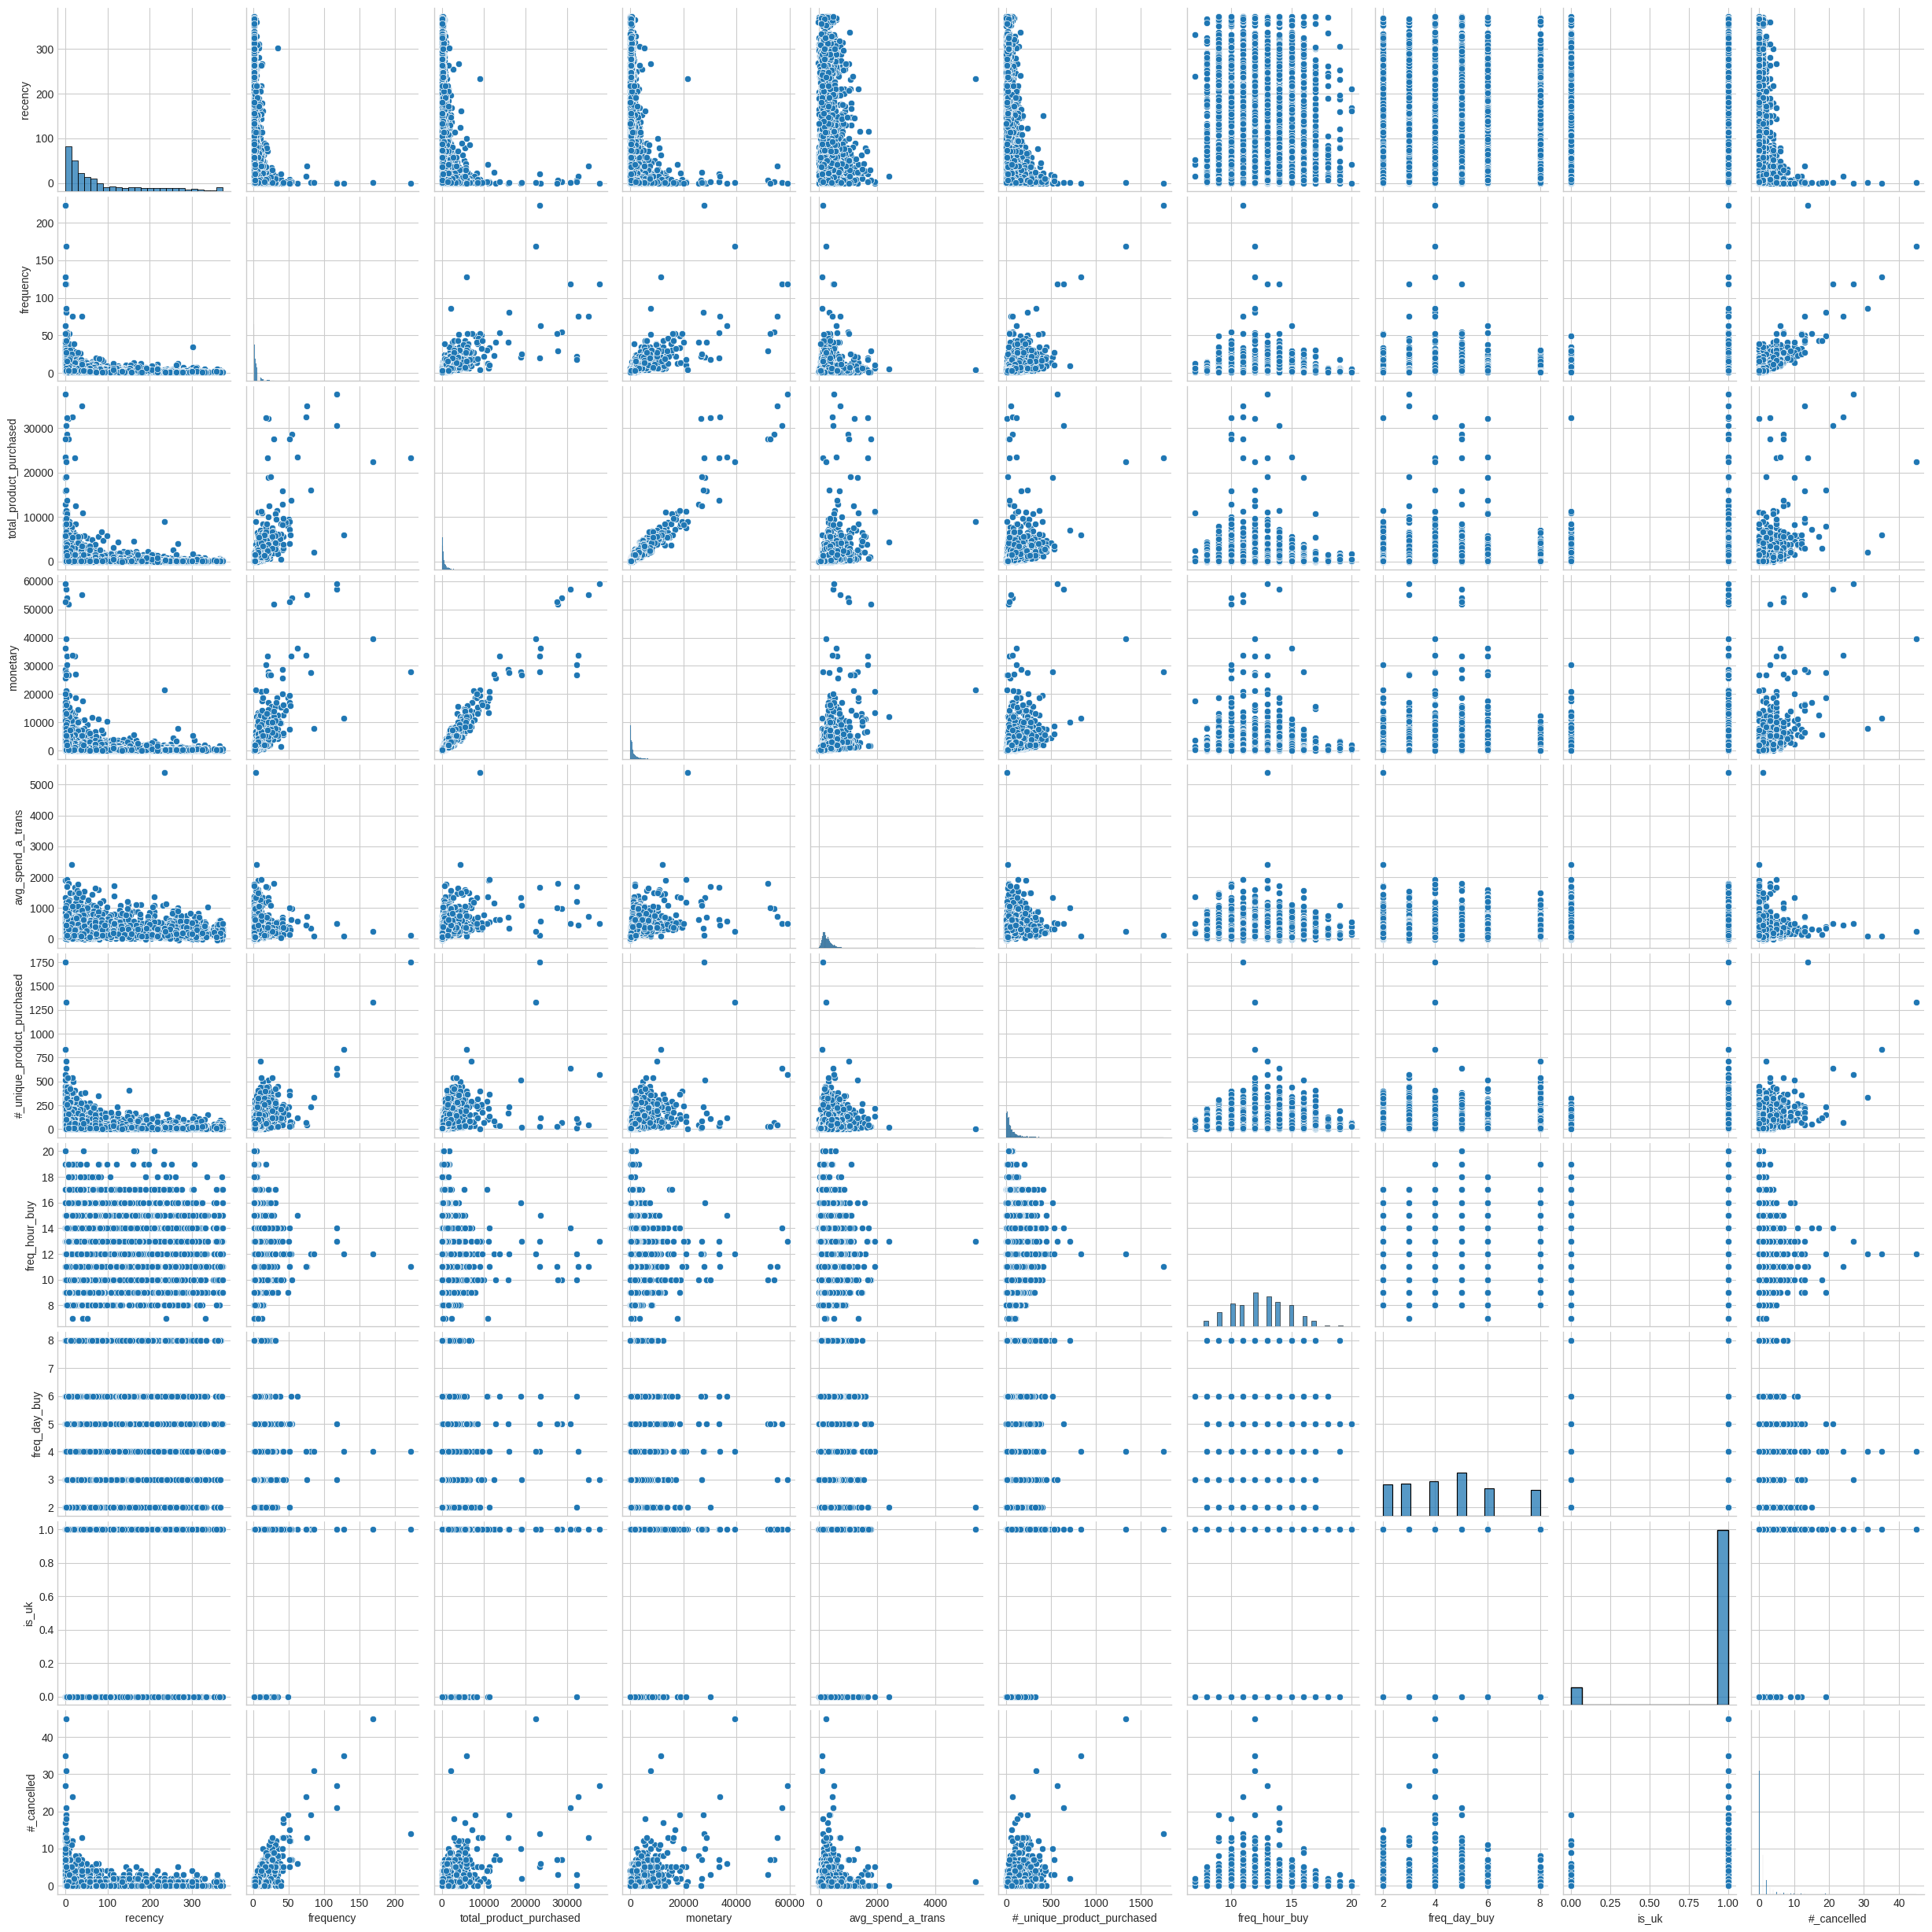

In [ ]:
p = sns.pairplot(rfm_cleaned.drop(columns='CustomerID'))

### PCA

---
* PCA giúp giảm tình trạng đa cộng tuyến
* Dễ dàng trực quan, khi giảm số lượng biến xuống
* Giúp giảm thời gian cho mô hình


In [ ]:
sc = StandardScaler()                             # chuẩn hóa dữ liệu với mean=0, std=1

cols = ['CustomerID', 'freq_day_buy', 'is_uk']
columns = rfm_cleaned.columns.difference(cols)

rfm_scaler = rfm_cleaned.copy()

rfm_scaler[columns] = sc.fit_transform(rfm_cleaned[columns])

rfm_scaler.set_index('CustomerID', inplace=True)
rfm_scaler.head()

recency  frequency  total_product_purchased  monetary  \
CustomerID                                                           
12346       2.360768  -0.353658                -0.426089 -0.447664   
12347      -0.892018   0.253465                 0.760979  0.824848   
12350       2.200136  -0.475083                -0.330949 -0.348934   
12352      -0.550676   0.739164                -0.199107  0.008613   
12353       1.135954  -0.475083                -0.416430 -0.421387   

            avg_spend_a_trans  #_unique_product_purchased  freq_hour_buy  \
CustomerID                                                                 
12346               -1.269740                   -0.769082      -1.080500   
12347                1.473716                    0.564000       0.658351   
12350                0.220256                   -0.559971       1.527777   
12352               -0.643746                   -0.011055       0.658351   
12353               -0.873180                   -0.729874       1.962490   

            freq_day_buy  is_uk  #_cancelled  
CustomerID                                    
12346                  3      1     0.097742  
12347                  3      0    -0.406389  
12350                  4      0    -0.406389  
12352                  3      0     1.106004  
12353                  5      0    -0.406389

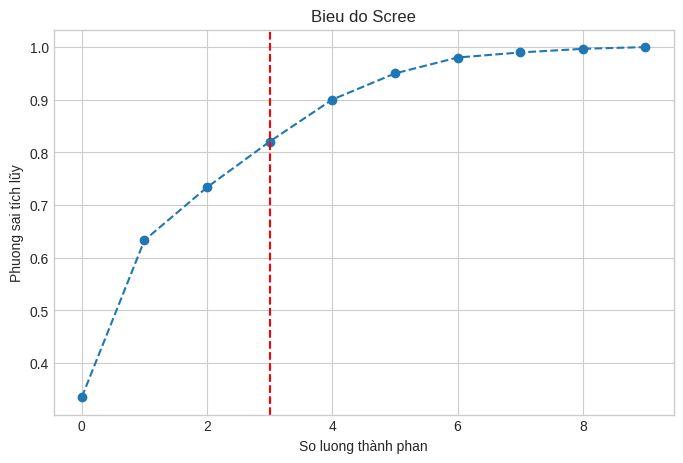

Số lượng thành phần tối ưu: 3


In [ ]:
pca = PCA()
pca.fit(rfm_scaler)

explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_ratio), marker='o', linestyle='--')
plt.xlabel('So luong thành phan')
plt.ylabel('Phuong sai tích lũy')
plt.title('Bieu do Scree')
plt.grid(True)

cumulative_explained_variance = np.cumsum(explained_variance_ratio)
optimal_components = np.argmax(cumulative_explained_variance >= 0.7) + 1

plt.axvline(optimal_components, color='red', linestyle='--')

plt.legend()` `
plt.show()

print(f'Số lượng thành phần tối ưu: {optimal_components}')

###### Chọn số thành phần tối ưu = 3 vì nó giải thích được trên 80% dữ liệu và tại đó phương sai tích lũy bắt đầu thay đổi ít (Elbow point)
Nguồn: Abdi, H., & Williams, L. J. (2010). Principal component analysis. Wiley interdisciplinary reviews: computational statistics, 2(4), 433-459.  (Mức phương sai được giải thích cao (70-90%) là tiêu chuẩn tốt để xác định số lượng thành phần cần giữ lại trong giảm chiều dữ liệu PCA)

In [ ]:
pca = PCA(n_components=3)
rfm_pca = pca.fit_transform(rfm_scaler)

component_names = [f"PC{i+1}" for i in range(rfm_pca.shape[1])]
df_pca = pd.DataFrame(rfm_pca, index=rfm_scaler.index, columns=component_names)
df_pca

PC1       PC2       PC3
CustomerID                              
12346      -1.247667 -1.800134 -0.459216
12347       1.487666 -1.346295  1.141518
12350      -1.250865 -0.666394  0.223335
12352       0.855871 -1.419501 -1.375360
12353      -1.511282  0.358427 -0.843991
...              ...       ...       ...
18280      -1.055613 -2.806678  0.390506
18281      -1.726626  3.179200  0.045509
18282      -0.851478  1.367097 -0.926024
18283       1.516434  0.823453 -1.399849
18287       0.378179 -0.595637  1.649773

[4152 rows x 3 columns]

Đại diện cho ba thành phần chính mà PCA đã tìm ra. Mỗi thành phần này là một tổ hợp tuyến tính của các biến gốc trong dữ liệu, được tối ưu hóa để giữ lại tối đa phương sai của dữ liệu. Các thành phần này không liên quan (orthogonal) với nhau, nghĩa là chúng đại diện cho các chiều không gian độc lập của dữ liệu.

In [ ]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

array([<Axes: title={'center': '% Explained Variance'}, xlabel='Component'>,
       <Axes: title={'center': '% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

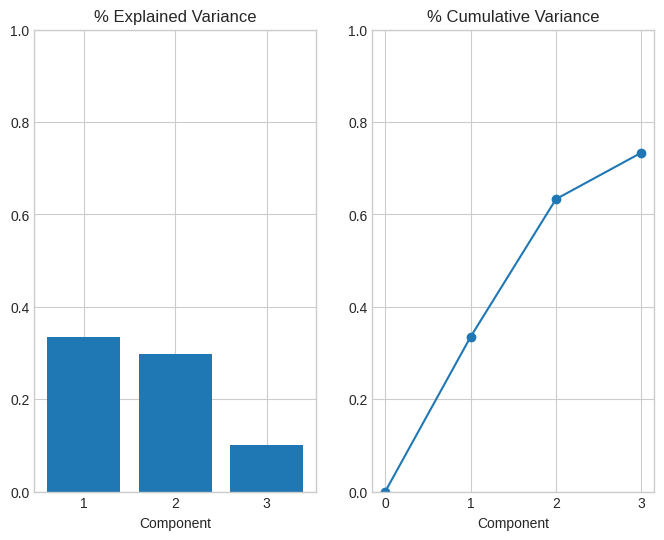

In [ ]:
plot_variance(pca)

Trục hoành (Component): Đại diện cho các thành phần chính (PC1, PC2, PC3).

Trục tung (Y-axis): Phần trăm phương sai mà mỗi thành phần chính giải thích.

Tổng cộng ba thành phần này giải thích được khoảng 80% phương sai của dữ liệu, nghĩa là chúng giữ lại phần lớn thông tin từ dữ liệu ban đầu.



In [ ]:
a = rfm_cleaned.drop(columns='CustomerID')

# Hàm làm nổi bật giá trị hàng đầu ở mỗi hàng theo các cột
def highlight_top3(column):
    top3 = column.abs().nlargest(3).index
    return ['background-color:  #ffeacc' if i in top3 else '' for i in column.index]

# Tạo dataframe với index là tên các cột, các cột là các PC
pc_df = pd.DataFrame(pca.components_.T, columns=['PC{}'.format(i+1) for i in range(pca.n_components_)],
                     index=a.columns)

pc_df.style.apply(highlight_top3, axis=0)

PC1: Tập trung vào tổng hoạt động mua sắm, với trọng số cao cho các biến liên quan đến tần suất và giá trị mua hàng.

PC2: Tập trung chủ yếu vào tần suất mua hàng theo ngày, điều này có thể phản ánh các thói quen mua sắm hàng ngày của khách hàng.

PC3: Tập trung vào chi tiêu trung bình trên mỗi giao dịch và các yếu tố liên quan khác.

### K-Means

In [ ]:
inertia = []
s_score = []
for cluster in range(2,10):
  km = KMeans(n_clusters=cluster, init='k-means++', n_init=10,  tol=0.0001, #Phương pháp khởi tạo tâm cụm thông minh để tăng tốc độ hội tụ của thuật toán K-Means.
              max_iter=300, algorithm = 'elkan', random_state=42)
  km.fit(df_pca) # Huấn luyện mô hình K-Means trên dữ liệu đã giảm chiều
  silhouette_avg = silhouette_score(df_pca, km.labels_)
  inertia.append(km.inertia_)
  s_score.append(silhouette_avg)

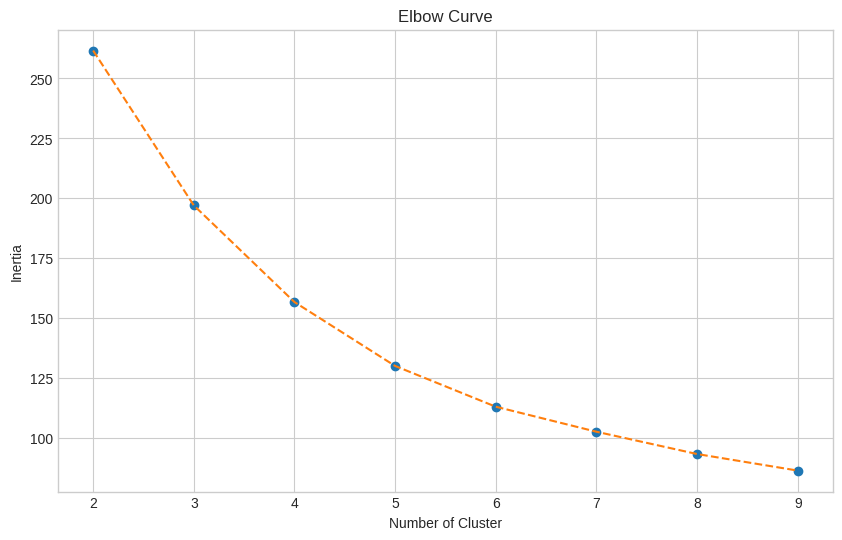

In [ ]:
plt.figure(1, figsize=(10, 6))
plt.plot(np.arange(2,10), inertia, 'o')
plt.plot(np.arange(2,10), inertia, '--')
plt.ylabel('Inertia')
plt.xlabel('Number of Cluster')
plt.title('Elbow Curve')
plt.show()

######  Phân vân giữa các điểm k=3, k=4 và k=5

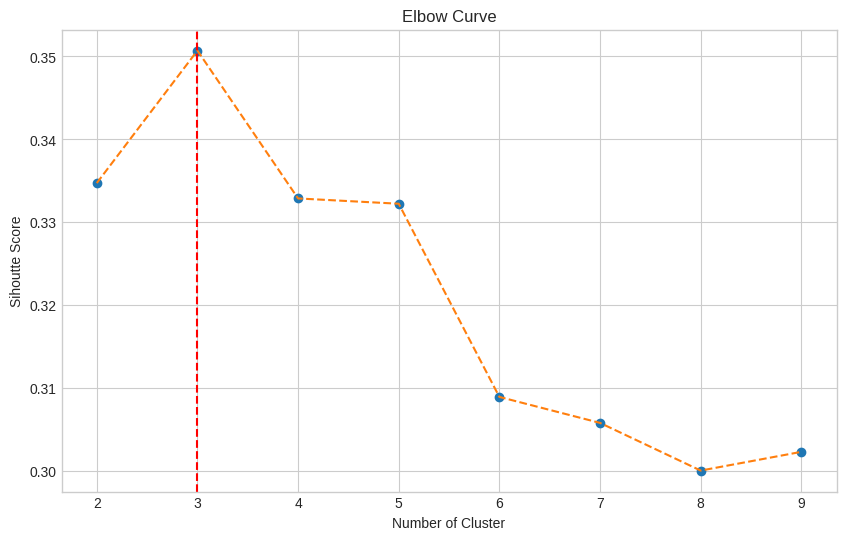

In [ ]:
plt.figure(1, figsize=(10, 6))
plt.plot(np.arange(2,10), s_score, 'o')
plt.plot(np.arange(2,10), s_score, '--')
plt.axvline(3, linestyle='--', color='red')
plt.ylabel('Sihoutte Score')
plt.xlabel('Number of Cluster')
plt.title('Elbow Curve')
plt.show()

###### -> Chọn K=3 vì có mức điểm sihoutte cao nhất

In [ ]:
model = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300,
               tol=0.0001, random_state=42, algorithm='elkan')
model.fit(df_pca)   # dùng để huấn luyện mô hình dựa trên dữ liệu đầu vào
labels = model.labels_    # lấy các nhãn cụm
centroids = model.cluster_centers_     # lấy các điểm trung tâm của mỗi cụm

In [ ]:
df_pca_new = df_pca.copy()
df_pca_new['cluster'] = labels    # tạo cột mới cluster dựa trên mô hình KMeans
df_pca_new.head()

PC1       PC2       PC3  cluster
CustomerID                                       
12346      -0.203597 -0.234200 -0.169279        1
12347      -0.190509  0.215001  0.082230        0
12350      -0.066241 -0.208624  0.126094        1
12352      -0.199375  0.092461  0.118326        1
12353       0.065944 -0.206891  0.223004        2

In [ ]:
df_new = rfm_cleaned.copy()
df_new['cluster'] = labels
df_new.head()

CustomerID  recency  frequency  total_product_purchased  monetary  \
0      12346      325          2                        0      0.00   
1      12347        1          7                     2458   4310.00   
4      12350      309          1                      197    334.40   
5      12352       35         11                      470   1545.41   
6      12353      203          1                       20     89.00   

   avg_spend_a_trans  #_unique_product_purchased  freq_hour_buy  freq_day_buy  \
0           0.000000                           1             10             3   
1         615.714286                         103             14             3   
4         334.400000                          17             16             4   
5         140.491818                          59             14             3   
6          89.000000                           4             17             5   

   is_uk  #_cancelled  cluster  
0      1          1.0        1  
1      0          0.0        0  
4      0          0.0        1  
5      0          3.0        1  
6      0          0.0        2

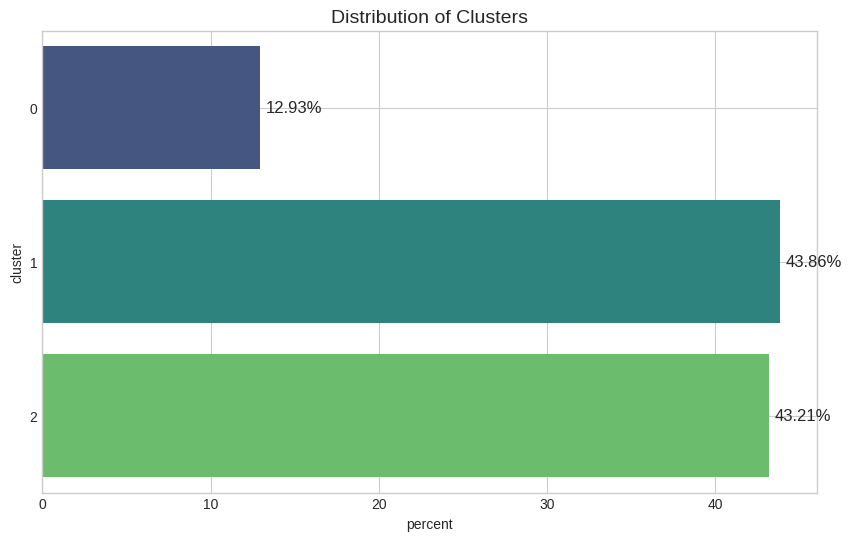

In [ ]:
pca_count = df_pca_new['cluster'].value_counts(normalize=True).reset_index(name='percent')
pca_count['percent'] = round(pca_count['percent']*100,2)

plt.figure(figsize=(10,6))
ax = sns.barplot(data=pca_count, x='percent', y='cluster', orient='h', palette='viridis')

def text_plot(ax, data):
    for p in ax.patches:
        width = p.get_width()
        plt.text(width + 2, p.get_y() + p.get_height() / 2, f'{width:.2f}%',
                 ha='center', va='center', fontsize=12)

text_plot(ax, pca_count)

plt.title('Distribution of Clusters', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
cluster_0 = df_pca_new[df_pca_new['cluster'] == 0]
cluster_1 = df_pca_new[df_pca_new['cluster'] == 1]
cluster_2 = df_pca_new[df_pca_new['cluster'] == 2]


colors = ['blue', 'red', 'green', 'purple']
fig = go.Figure()

fig.add_trace(go.Scatter3d(x=cluster_0['PC1'], y=cluster_0['PC2'], z=cluster_0['PC3'],
                           mode='markers', marker=dict(color=colors[0], size=10, opacity=0.6), name='Cluster_0'))
fig.add_trace(go.Scatter3d(x=cluster_1['PC1'], y=cluster_1['PC2'], z=cluster_1['PC3'],
                           mode='markers', marker=dict(color=colors[1], size=10, opacity=0.6), name='Cluster_1'))
fig.add_trace(go.Scatter3d(x=cluster_2['PC1'], y=cluster_2['PC2'], z=cluster_2['PC3'],
                           mode='markers', marker=dict(color=colors[2], size=10, opacity=0.6), name='Cluster_2'))


fig.update_layout(
    title_text='3D - Visualization in PCA',
    title_font_size=20,
    width=1500,
    height=1000
)

fig.show()

In [ ]:
X = df_pca_new.drop(columns='cluster', axis=1)
labels = df_pca_new['cluster']
# silhouette_score
silhouette_score_km = metrics.silhouette_score(X, labels)

# Davies-Bouldin Index
davies_bouldin_index_km = metrics.davies_bouldin_score(X, labels)

# Calinski-Harabasz Index
calinski_harabasz_index_km = metrics.calinski_harabasz_score(X, labels)

scores = {'Sihoutte Score':silhouette_score_km, 'Davies Bouldin Score': davies_bouldin_index_km, 'Calinski Harabasx Score': calinski_harabasz_index_km}
df_score = pd.DataFrame.from_dict(scores, orient='index', columns=['Score'])
df_score

Score
Sihoutte Score              0.350701
Davies Bouldin Score        0.998506
Calinski Harabasx Score  2321.542455

In [ ]:
def radar_chart(df):
    # Màu sắc cho các cụm
    colors = ['#e8000b', '#1ac938', '#023eff']

    # Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    features = df.drop(columns=['cluster', 'CustomerID'])
    df_standardized = scaler.fit_transform(features)

    # Tạo DataFrame cho dữ liệu đã chuẩn hóa
    df_standardized = pd.DataFrame(df_standardized, columns=features.columns, index=df.index)
    df_standardized['cluster'] = df['cluster']

    # Tính trung tâm của mỗi cụm
    cluster_centroids = df_standardized.groupby('cluster').mean()

    # Hàm tạo radar chart
    def create_radar_chart(ax, angles, data, color, cluster):
        ax.fill(angles, data, color=color, alpha=0.5)
        ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
        ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)

    labels = np.array(cluster_centroids.columns)
    num_vars = len(labels)

    # Tạo góc cho mỗi trục
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()  # Sửa đổi endpoint=False để không thêm góc cuối cùng vào danh sách

    fig, ax = plt.subplots(figsize=(25, 10), subplot_kw=dict(polar=True), nrows=1, ncols=len(colors))

    # Tạo radar chart cho mỗi cụm
    for i, color in enumerate(colors):
        if i < len(cluster_centroids):
            data = cluster_centroids.loc[i].tolist()
            create_radar_chart(ax[i], angles, data, color, i)

    # Thêm dữ liệu
    for i in range(len(colors)):
        if i < len(cluster_centroids):
            ax[i].set_xticks(angles)
            ax[i].set_xticklabels(labels, fontsize=12)

        ax[i].grid(color='grey', linewidth=0.5)

    plt.tight_layout()
    plt.show()


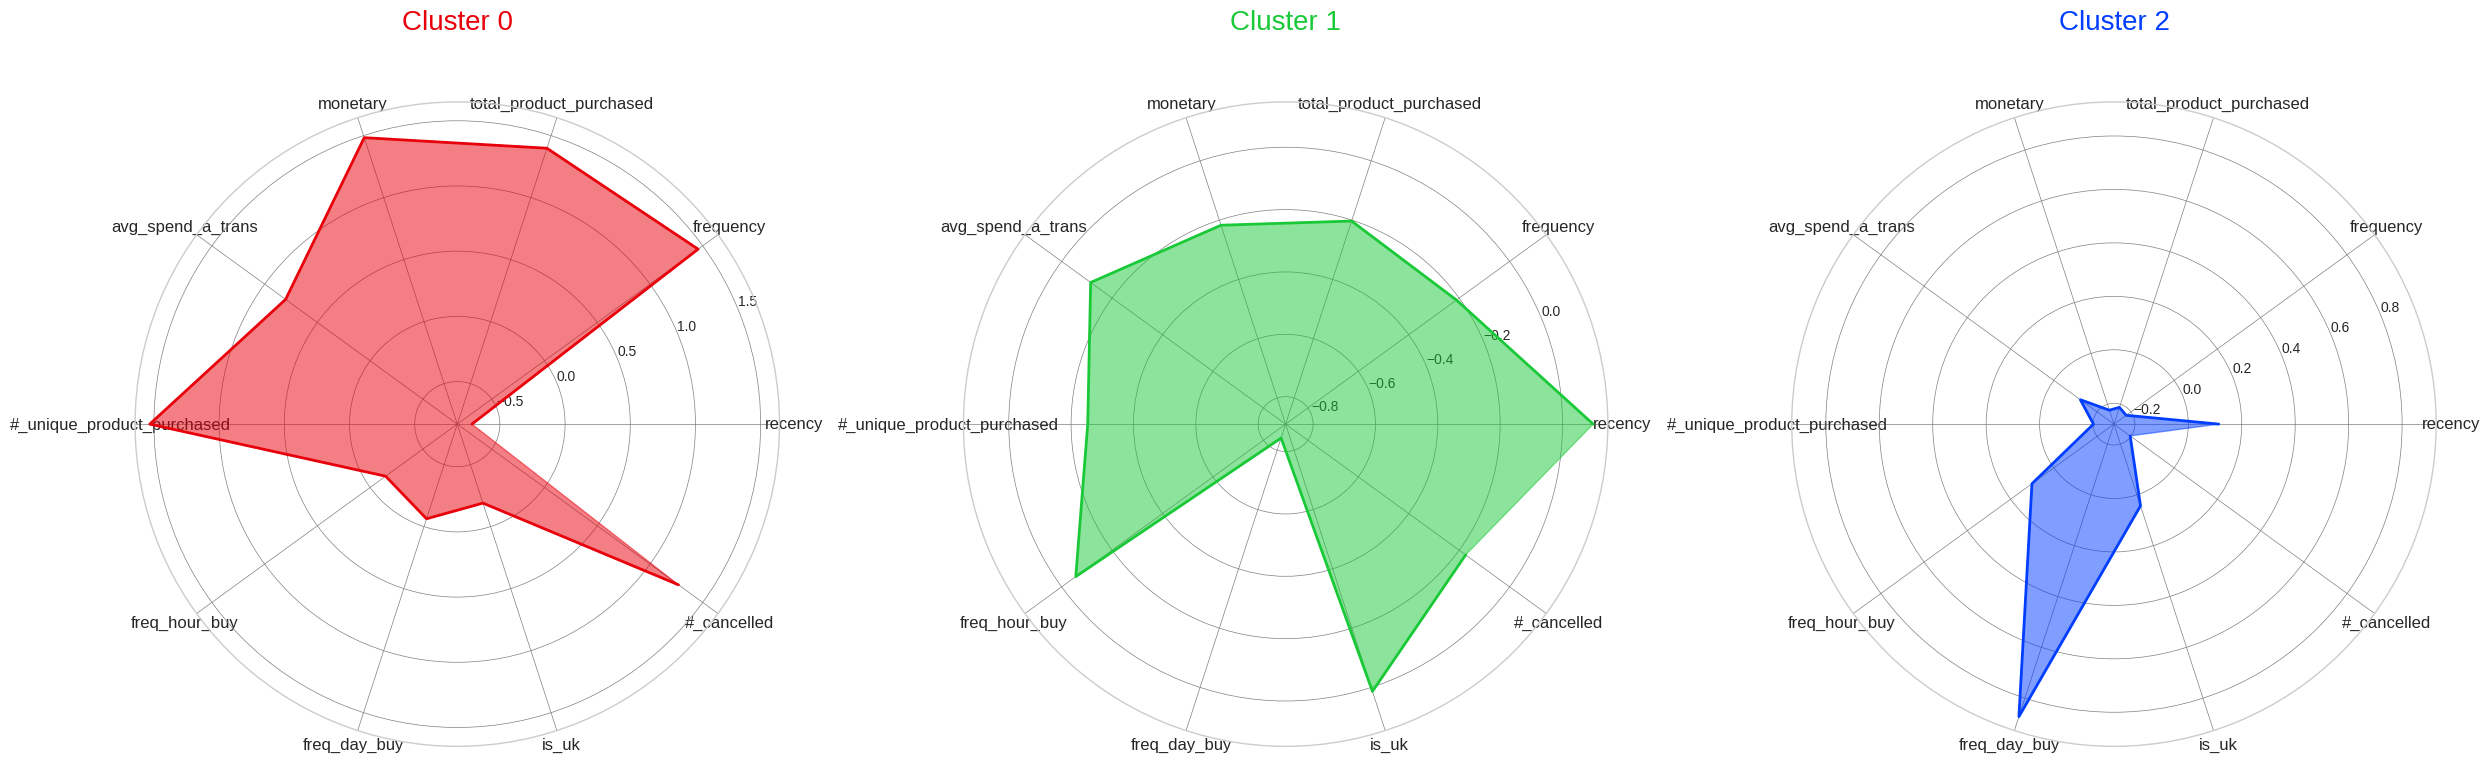

In [ ]:
radar_chart(df_new)

### DBSCAN

--------------------------------------------------------------------------------
DBSCAN (Density-Based Clustering) là viết tắt của cụm ứng dụng không gian dựa trên mật độ có nhiễu. Đó là một thuật toán phân cụm dựa trên mật độ. Nó có thể tìm thấy các cụm có hình dạng bất thường. Nó phân tách các vùng theo các vùng có mật độ thấp nên cũng có thể phát hiện các ngoại lệ rất tốt. Thuật toán này tốt hơn k-mean khi làm việc với dữ liệu có hình dạng kỳ lạ

Nguồn: https://phamdinhkhanh.github.io/deepai-book/ch_ml/DBSCAN.html

Tìm eps và minpts:
https://stataiml.com/posts/how_to_set_dbscan_paramter/#:~:text=most%20of%20cases.-,Choosing%20eps,the%20same%20as%20the%20MinPts%20.

In [ ]:
dbs_df = df_pca.copy()
dbs_df.head()

PC1       PC2       PC3
CustomerID                              
12346      -0.203597 -0.234200 -0.169279
12347      -0.190509  0.215001  0.082230
12350      -0.066241 -0.208624  0.126094
12352      -0.199375  0.092461  0.118326
12353       0.065944 -0.206891  0.223004

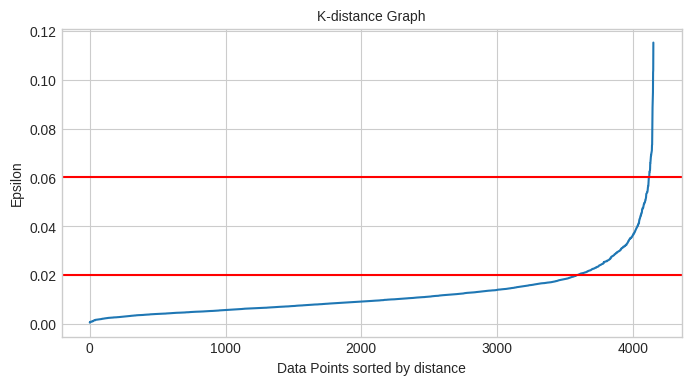

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=7)
nbrs = neigh.fit(dbs_df)
distances, indices = nbrs.kneighbors(dbs_df)

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(8,4))
plt.plot(distances)
plt.axhline(0.02, color='red')
plt.axhline(0.06, color='red')
plt.title('K-distance Graph',fontsize=10)
plt.xlabel('Data Points sorted by distance',fontsize=10)
plt.ylabel('Epsilon',fontsize=10)
plt.show()

In [ ]:
eps_s = np.linspace(0.02, 0.06, 20)
min_pts = np.linspace(4, 20, 20).astype(int)   # min_point > số chiều

best_silhouette_score = 0
best_e = 0
best_m = 0

for e in eps_s:
    for m in min_pts:
        db = DBSCAN(eps=e, min_samples=m).fit(dbs_df)      # y hệt kmeans
        labels = db.labels_

        n_noise_ = list(labels).count(-1)
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

        if n_noise_ < 200 and n_clusters_ > 1:
            silhouette_score = metrics.silhouette_score(dbs_df, labels)
            if silhouette_score > best_silhouette_score:
                best_silhouette_score = silhouette_score
                best_e = e
                best_m = m

print(f'best eps: {best_e}')
print(f'best min_samples: {best_m}')
print(f'best silhouette score: {best_silhouette_score}')

best eps: 0.06
best min_samples: 6
best silhouette score: 0.1403770371480762


In [ ]:
from sklearn.cluster import DBSCAN #Huấn luyện mô hình

dbscan = DBSCAN(eps=0.06,
            min_samples=6, metric='euclidean')

dbscan.fit(dbs_df)
dbs_df['cluster'] = dbscan.labels_

In [ ]:
dbs_df_new = rfm_cleaned.copy()
dbs_df_new['cluster'] = dbscan.labels_
dbs_df_new = dbs_df_new[dbs_df_new['cluster'] != -1] #Loại bỏ giá trị nhiễu khi có nhãn = -1

In [ ]:
pca_count = dbs_df_new['cluster'].value_counts(normalize=True).reset_index(name='percent')  # đếm số cụm mà DBSCAN cho ra
pca_count['percent'] = round(pca_count['percent']*100,2)

pca_count

cluster  percent
0        2    23.14
1        1    17.50
2        0    16.10
3        3    15.63
4        4    13.87
5        5    13.44
6        6     0.32

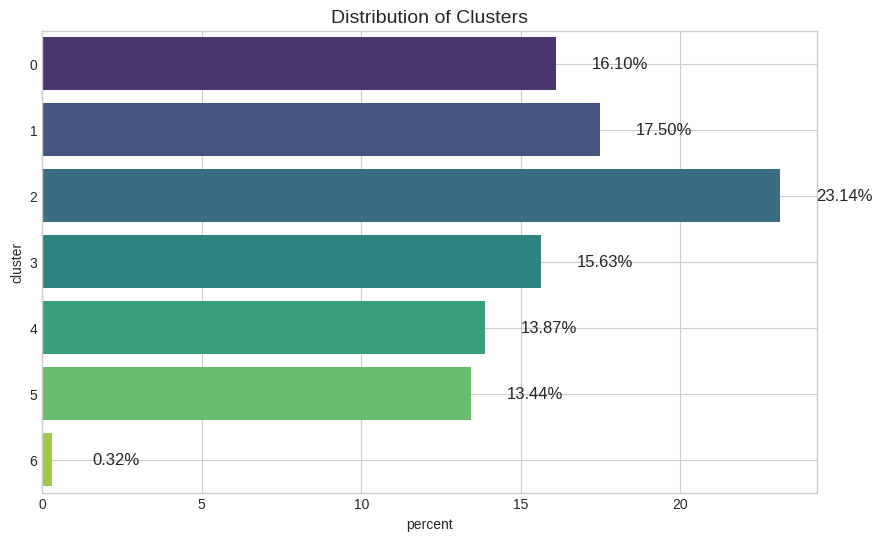

In [ ]:
pca_count = dbs_df_new['cluster'].value_counts(normalize=True).reset_index(name='percent')  # đếm số cụm mà DBSCAN cho ra
pca_count['percent'] = round(pca_count['percent']*100,2)

plt.figure(figsize=(10,6))
ax = sns.barplot(data=pca_count, x='percent', y='cluster', orient='h', palette='viridis')

def text_plot(ax, data):
    for p in ax.patches:
        width = p.get_width()
        plt.text(width + 2, p.get_y() + p.get_height() / 2, f'{width:.2f}%',
                 ha='center', va='center', fontsize=12)

text_plot(ax, pca_count)

plt.title('Distribution of Clusters', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
cluster_0 = dbs_df[dbs_df['cluster'] == 0]
cluster_1 = dbs_df[dbs_df['cluster'] == 1]
cluster_2 = dbs_df[dbs_df['cluster'] == 2]
cluster_3 = dbs_df[dbs_df['cluster'] == 3]
cluster_4 = dbs_df[dbs_df['cluster'] == 4]
cluster_5 = dbs_df[dbs_df['cluster'] == 5]
cluster_6 = dbs_df[dbs_df['cluster'] == 6]





colors = ['blue', 'red', 'green', 'purple', 'brown', 'black', 'magenta']
fig = go.Figure()

fig.add_trace(go.Scatter3d(x=cluster_0['PC1'], y=cluster_0['PC2'], z=cluster_0['PC3'],
                           mode='markers', marker=dict(color=colors[0], size=5, opacity=0.6), name='Cluster_0'))
fig.add_trace(go.Scatter3d(x=cluster_1['PC1'], y=cluster_1['PC2'], z=cluster_1['PC3'],
                           mode='markers', marker=dict(color=colors[1], size=5, opacity=0.6), name='Cluster_1'))
fig.add_trace(go.Scatter3d(x=cluster_2['PC1'], y=cluster_2['PC2'], z=cluster_2['PC3'],
                            mode='markers', marker=dict(color=colors[2], size=5, opacity=0.6), name='Cluster_2'))
fig.add_trace(go.Scatter3d(x=cluster_3['PC1'], y=cluster_3['PC2'], z=cluster_3['PC3'],
                           mode='markers', marker=dict(color=colors[3], size=5, opacity=0.6), name='Cluster_3'))
fig.add_trace(go.Scatter3d(x=cluster_4['PC1'], y=cluster_4['PC2'], z=cluster_4['PC3'],
                           mode='markers', marker=dict(color=colors[4], size=5, opacity=0.6), name='Cluster_4'))
fig.add_trace(go.Scatter3d(x=cluster_5['PC1'], y=cluster_5['PC2'], z=cluster_5['PC3'],
                           mode='markers', marker=dict(color=colors[5], size=5, opacity=0.6), name='Cluster_5'))
fig.add_trace(go.Scatter3d(x=cluster_6['PC1'], y=cluster_6['PC2'], z=cluster_6['PC3'],
                           mode='markers', marker=dict(color=colors[6], size=5, opacity=0.6), name='Cluster_6'))

fig.update_layout(
    title_text='3D - Visualization in PCA',
    title_font_size=20,
    width=800,
    height=700
)

fig.show()

In [ ]:
X = dbs_df.drop(columns='cluster', axis=1)
labels = dbs_df['cluster']
# silhouette_score
silhouette_score_dbs = metrics.silhouette_score(X, labels)

# Davies-Bouldin Index
davies_bouldin_index_dbs = metrics.davies_bouldin_score(X, labels)

# Calinski-Harabasz Index
calinski_harabasz_index_dbs = metrics.calinski_harabasz_score(X, labels)

scores = {'Sihoutte Score':silhouette_score_dbs, 'Davies Bouldin Score': davies_bouldin_index_dbs, 'Calinski Harabasx Score': calinski_harabasz_index_dbs}
df_score = pd.DataFrame.from_dict(scores, orient='index', columns=['Score'])
df_score

Score
Sihoutte Score             0.140377
Davies Bouldin Score       2.262253
Calinski Harabasx Score  905.256020

In [ ]:
def radar_chart_dbs(df):
    # Màu sắc cho các cụm
    colors = ['blue', 'red', 'green', 'purple', 'brown', 'black', 'magenta']

    # Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    features = df.drop(columns=['cluster', 'CustomerID'])
    df_standardized = scaler.fit_transform(features)

    # Tạo DataFrame cho dữ liệu đã chuẩn hóa
    df_standardized = pd.DataFrame(df_standardized, columns=features.columns, index=df.index)
    df_standardized['cluster'] = df['cluster']

    # Tính trung tâm của mỗi cụm
    cluster_centroids = df_standardized.groupby('cluster').mean()

    # Hàm tạo radar chart
    def create_radar_chart(ax, angles, data, color, cluster):
        ax.fill(angles, data, color=color, alpha=0.5)
        ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
        ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)

    labels = np.array(cluster_centroids.columns)
    num_vars = len(labels)

    # Tạo góc cho mỗi trục
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()  # Sửa đổi endpoint=False để không thêm góc cuối cùng vào danh sách

    fig, ax = plt.subplots(figsize=(25, 10), subplot_kw=dict(polar=True), nrows=1, ncols=len(colors))

    # Tạo radar chart cho mỗi cụm
    for i, color in enumerate(colors):
        if i < len(cluster_centroids):
            data = cluster_centroids.loc[i].tolist()
            create_radar_chart(ax[i], angles, data, color, i)

    # Thêm dữ liệu
    for i in range(len(colors)):
        if i < len(cluster_centroids):
            ax[i].set_xticks(angles)
            ax[i].set_xticklabels(labels, fontsize=12)

        ax[i].grid(color='grey', linewidth=0.5)

    plt.tight_layout()
    plt.show()


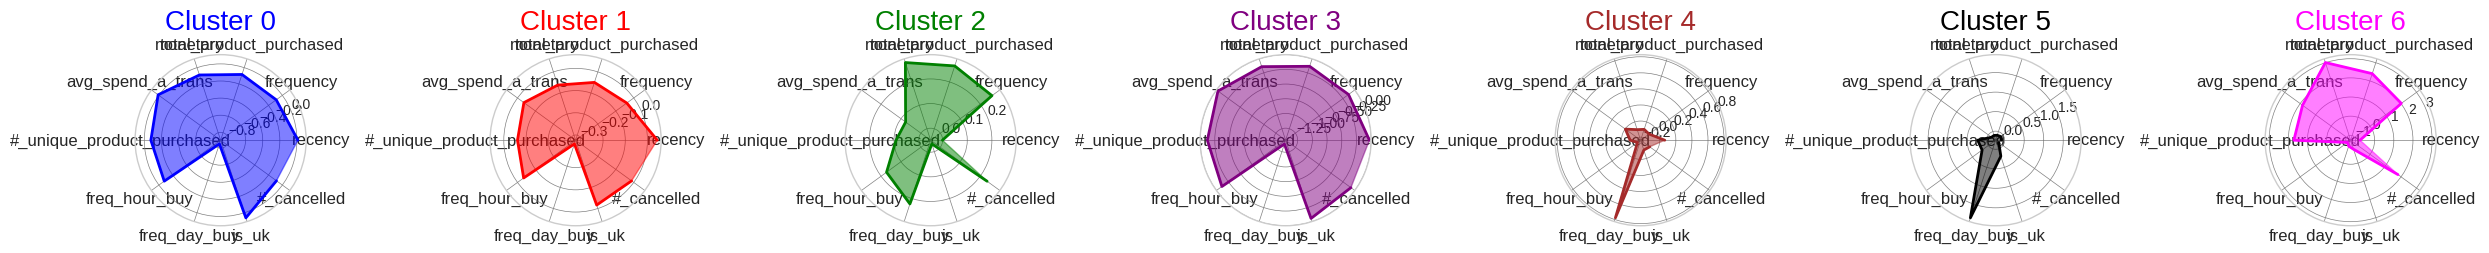

In [ ]:
radar_chart_dbs(dbs_df_new)

### Summary

--------------------------------------------------------------------------------
ĐIỂM ĐÁNH GIÁ PHÂN CỤM


1. Silhouette Score: Đánh giá mức độ tách biệt giữa các cụm và mức độ gần gũi của các điểm trong cùng một cụm. Silhouette Score càng gần 1 thì cụm càng tốt, càng gần -1 thì cụm càng không tốt.

2. Davies–Bouldin Index: Đo lường sự tách biệt giữa các cụm. Giá trị càng thấp cho thấy các cụm càng tốt, với 0 là giá trị tốt nhất.

3. Calinski-Harabasz Index (chỉ số Variance Ratio): Tính toán tỷ lệ giữa phương sai giữa các cụm và phương sai bên trong các cụm. Giá trị càng cao cho thấy các cụm càng tốt.
> Chouikhi, H., Charrad, M., & Ghazzali, N. (2015, June). A comparison study of clustering validity indices. In 2015 global summit on Computer & information technology (GSCIT) (pp. 1-4). IEEE.



> Công thức tính: https://towardsdatascience.com/cheat-sheet-to-implementing-7-methods-for-selecting-optimal-number-of-clusters-in-python-898241e1d6ad









In [ ]:
results = pd.DataFrame(
    {'Algorithms': ['K-Means', 'DBSCAN'],
     'Silhouette Score': [silhouette_score_km, silhouette_score_dbs],
     'Davies Bouldin Index':[davies_bouldin_index_km, davies_bouldin_index_dbs],
     'Calinski Harabasz Index': [calinski_harabasz_index_km,  calinski_harabasz_index_dbs]}
)
display(results)

Algorithms  Silhouette Score  Davies Bouldin Index  Calinski Harabasz Index
0    K-Means          0.350701              0.998506              2321.542455
1     DBSCAN          0.140377              2.262253               905.256020



---

#### K-Means: Có Calinski-Harabasz Index cao, và Silhouette Score ở mức cao gần 1, và Davies Bouldin Index nhỏ hơn DBSCAN , cho thấy các cụm được phân biệt rõ ràng.
---



### Ý NGHĨA CÁC CỤM (Dựa trên kết quả mô hình KMean)

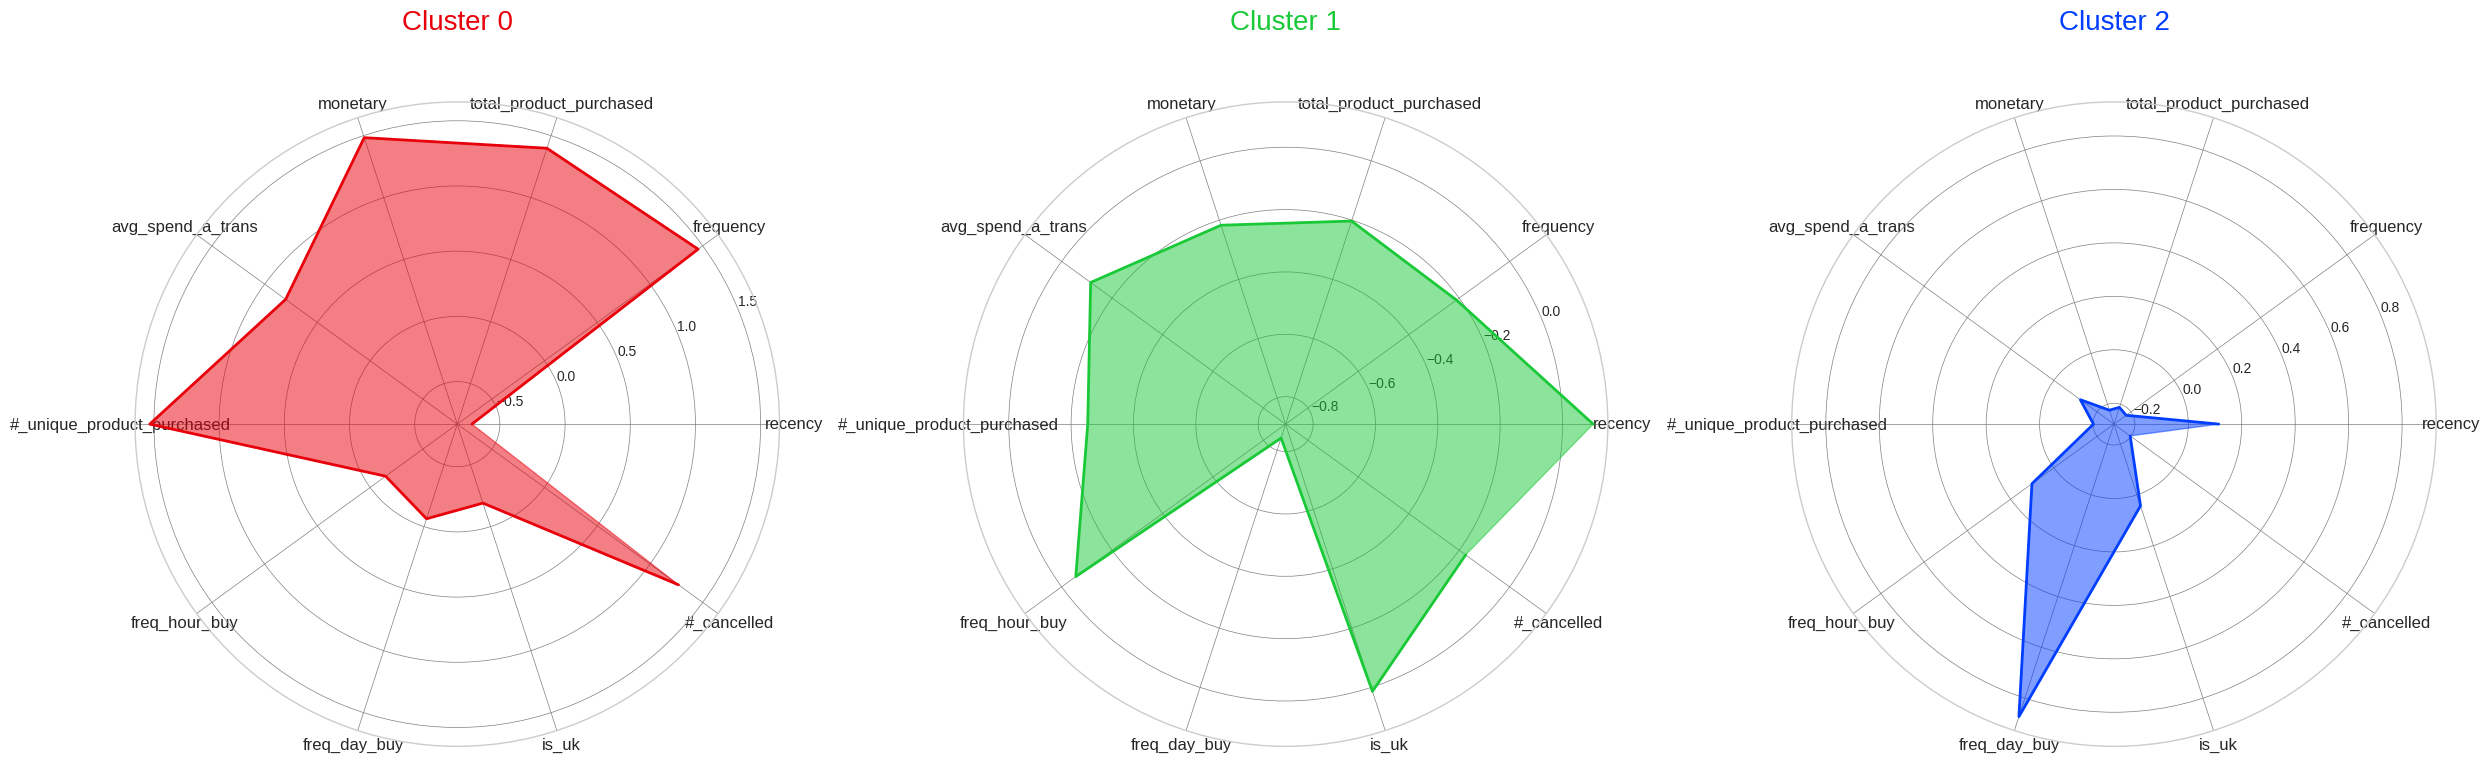

In [ ]:
radar_chart(df_new) # K-Means (3 cụm)

In [ ]:
# radar_chart_dbs(dbs_df_new) # DBSCAN (6 cụm)


---

* CỤM 0: NHÓM KHÁCH HÀNG CŨ CHI TIÊU CAO KHÔNG THƯỜNG XUYÊN

  - Khách hàng chi tiêu khá nhiều (Monetary trung bình cao) và mua một số lượng sản phẩm đáng kể (Total_Product_Purchased trung bình cao) nhưng không mua sắm thường xuyên (frequency thấp)
  - Nhóm này có thời gian mua sắm khá xa xo với hiện tại (recency cao)
  - Họ thường là khách hàng đến từ Anh, họ thường mua vào buổi chiều

  
* CỤM 1: NHÓM KHÁCH HÀNG TÍCH CỰC
  - Nhóm này có số lượng sản phẩm mua sắm khá cao, lượng tiền chi nhiều, và tần suất mua hàng rất cao.
  - Họ cùng thường xuyên mua các loại sản phẩm khác nhau và là khách hàng thường xuyên mua gần đây
  - Họ thường mua vào buổi sáng/trưa và vào giữa tuần

* CỤM 2: NHÓM KHÁCH HÀNG TRUNG BÌNH
  - Nhóm khách hàng mua sắm rất nhiều (total_product_purchased cao), chi tiêu lớn (monetary cao), tần suất mua hàng cao(freqency cao)
  - Số sản phẩm khác nhau mà họ mua khá thấp
  - Họ có xu hướng mua hàng vào sáng sớm và các ngày đầu tuần



### Top 10 sản phẩm bán chạy trong mỗi cụm

In [ ]:
df['CustomerID'] = df['CustomerID'].astype('int')
df_new['CustomerID'] = df_new['CustomerID'].astype('int')

df_all = df.merge(df_new, how='inner', on='CustomerID')

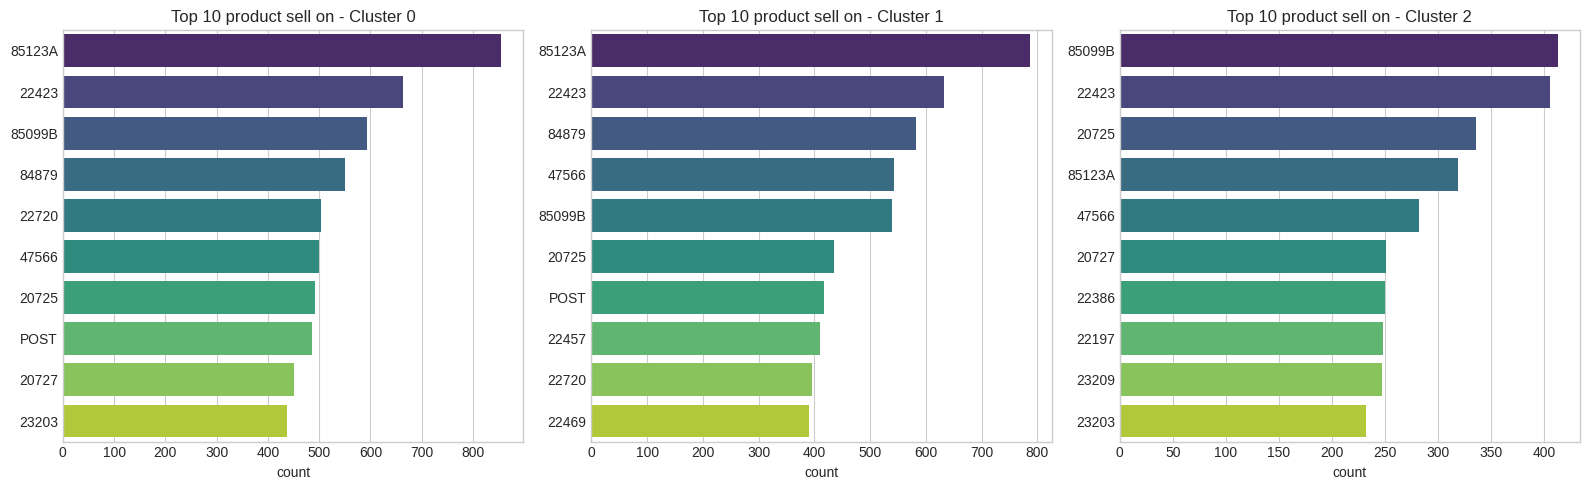

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(16, 5))
ax = ax.flatten()

for i in range(3):
    df_ = df_all[df_all['cluster'] == i]
    top_stock = df_['StockCode'].value_counts().reset_index().head(10)
    top_stock.columns = ['StockCode', 'count']

    sns.barplot(data=top_stock,
                y='StockCode',
                x='count',
                palette='viridis',
                orient='h',
                ax=ax[i])
    ax[i].set_title(f'Top 10 product sell on - Cluster {i}')
    ax[i].set_ylabel(None)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

### Top 10 sản phẩm có doanh số cao nhất từng cụm

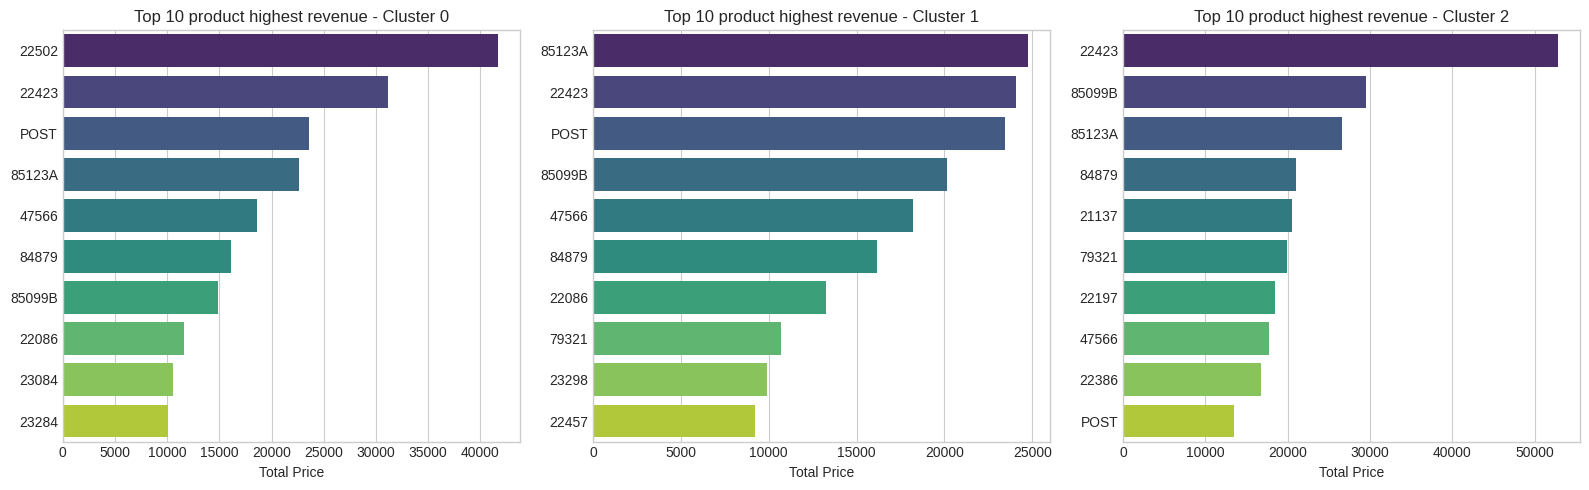

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(16, 5))
ax = ax.flatten()

for i in range(3):
    df_ = df_all[df_all['cluster'] == i]
    top_stock = df_.groupby('StockCode')['Total Price'].sum().reset_index().sort_values(by='Total Price', ascending=False).head(10)
    top_stock.columns = ['StockCode', 'Total Price']

    sns.barplot(data=top_stock,
                y='StockCode',
                x='Total Price',
                palette='viridis',
                orient='h',
                ax=ax[i])
    ax[i].set_title(f'Top 10 product highest revenue - Cluster {i}')
    ax[i].set_ylabel(None)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

### Số lượng sản phẩm và doanh thu qua các tháng từng cụm

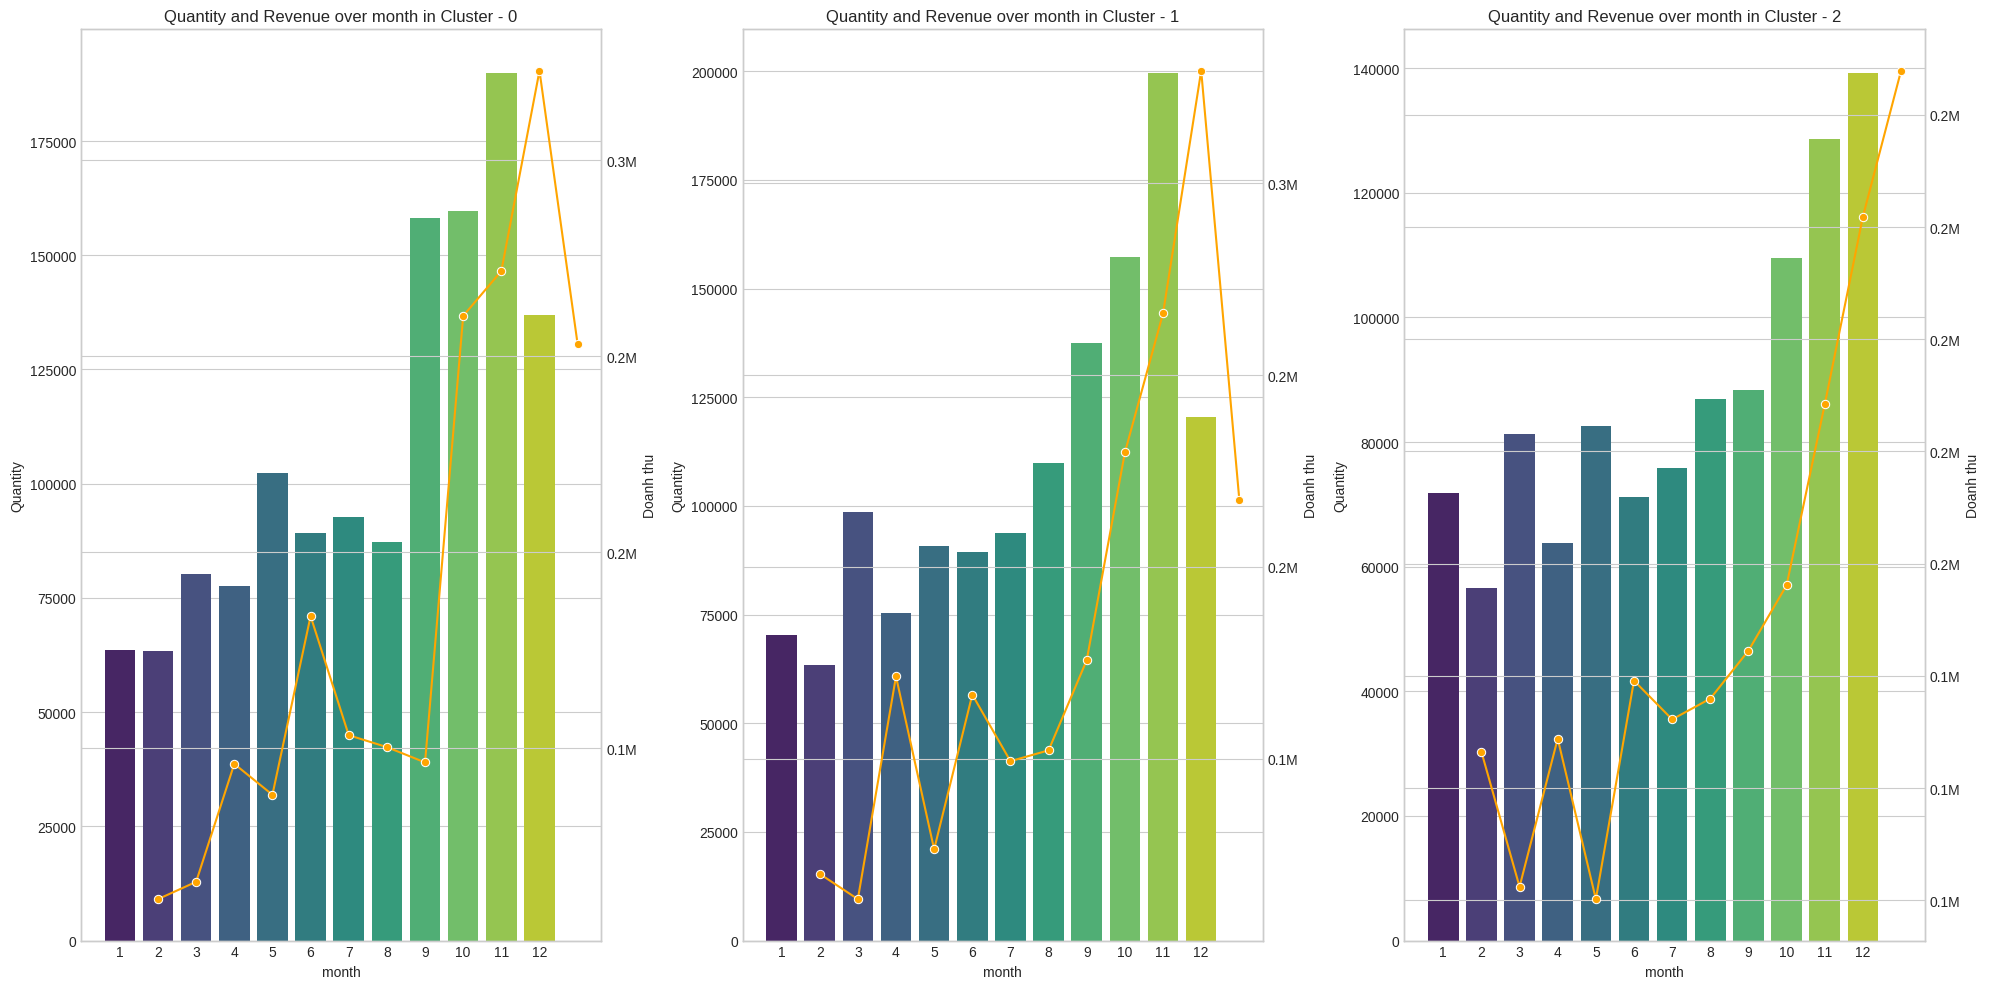

In [ ]:
# Khởi tạo hình vẽ
fig, axes = plt.subplots(1, 3, figsize=(20, 10), sharex=True)
axes = axes.flatten()

for i in range(3):
    df_ = df_all[df_all['cluster'] == i]

    # Tính tổng số lượng và doanh thu theo tháng
    monthly_data = df_.groupby('month').agg({'Quantity': 'sum', 'Total Price': 'sum'}).reset_index()

    sns.barplot(data=monthly_data,
                x='month',
                y='Quantity',
                palette='viridis',
                ax=axes[i])
    axes[i].set_ylabel('Quantity')

    ax2 = axes[i].twinx()
    sns.lineplot(data=monthly_data, x='month', y='Total Price', marker='o', color='orange', ax=ax2)
    ax2.set_ylabel('Doanh thu')
    ax2.set_yticklabels([f'{x/1e6:.1f}M' for x in ax2.get_yticks()])

    axes[i].set_title(f'Quantity and Revenue over month in Cluster - {i}')
    if i == 3:
        axes[i].set_xlabel('Month')

plt.tight_layout()
plt.show()

### Top 10 Khách hàng mua thường xuyên mỗi cụm

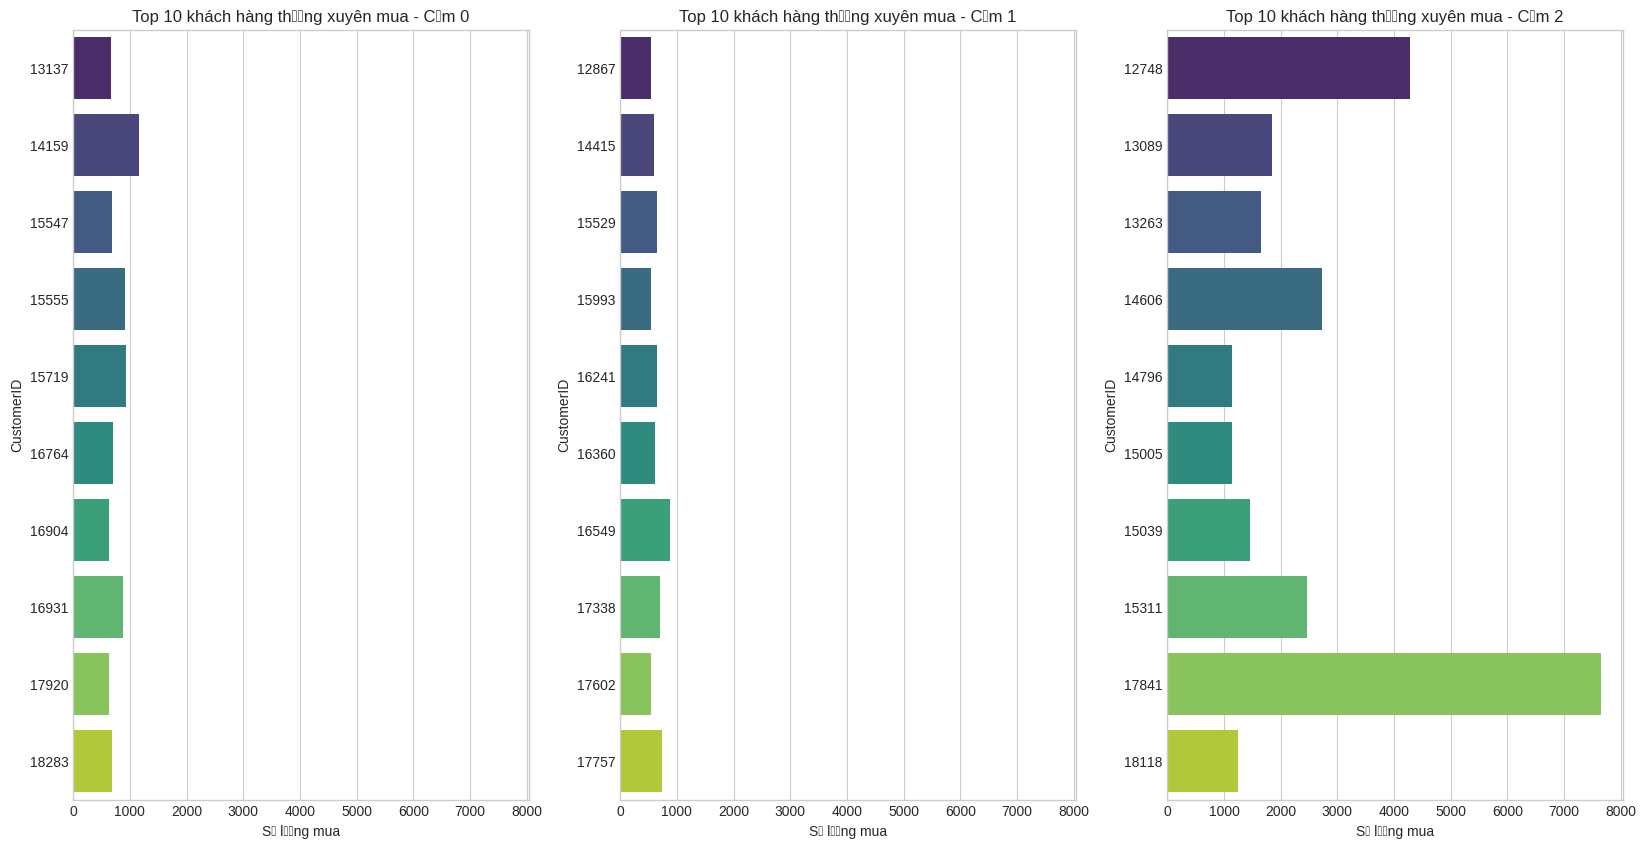

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10), sharex=True)
axes = axes.flatten()

for i in range(3):
    df_ = df_all[df_all['cluster'] == i]

    # Tính số lượng mua của từng khách hàng trong cụm
    top_customers = df_['CustomerID'].value_counts().reset_index().head(10)
    top_customers.columns = ['CustomerID', 'count']

    sns.barplot(data=top_customers,
                y='CustomerID',
                x='count',
                palette='viridis',
                ax=axes[i],
                orient='h')
    axes[i].set_ylabel('CustomerID')
    axes[i].set_xlabel('Số lượng mua')
    axes[i].set_title(f'Top 10 khách hàng thường xuyên mua - Cụm {i}')

plt.tight_layout
plt.show()

### Histogram Chart

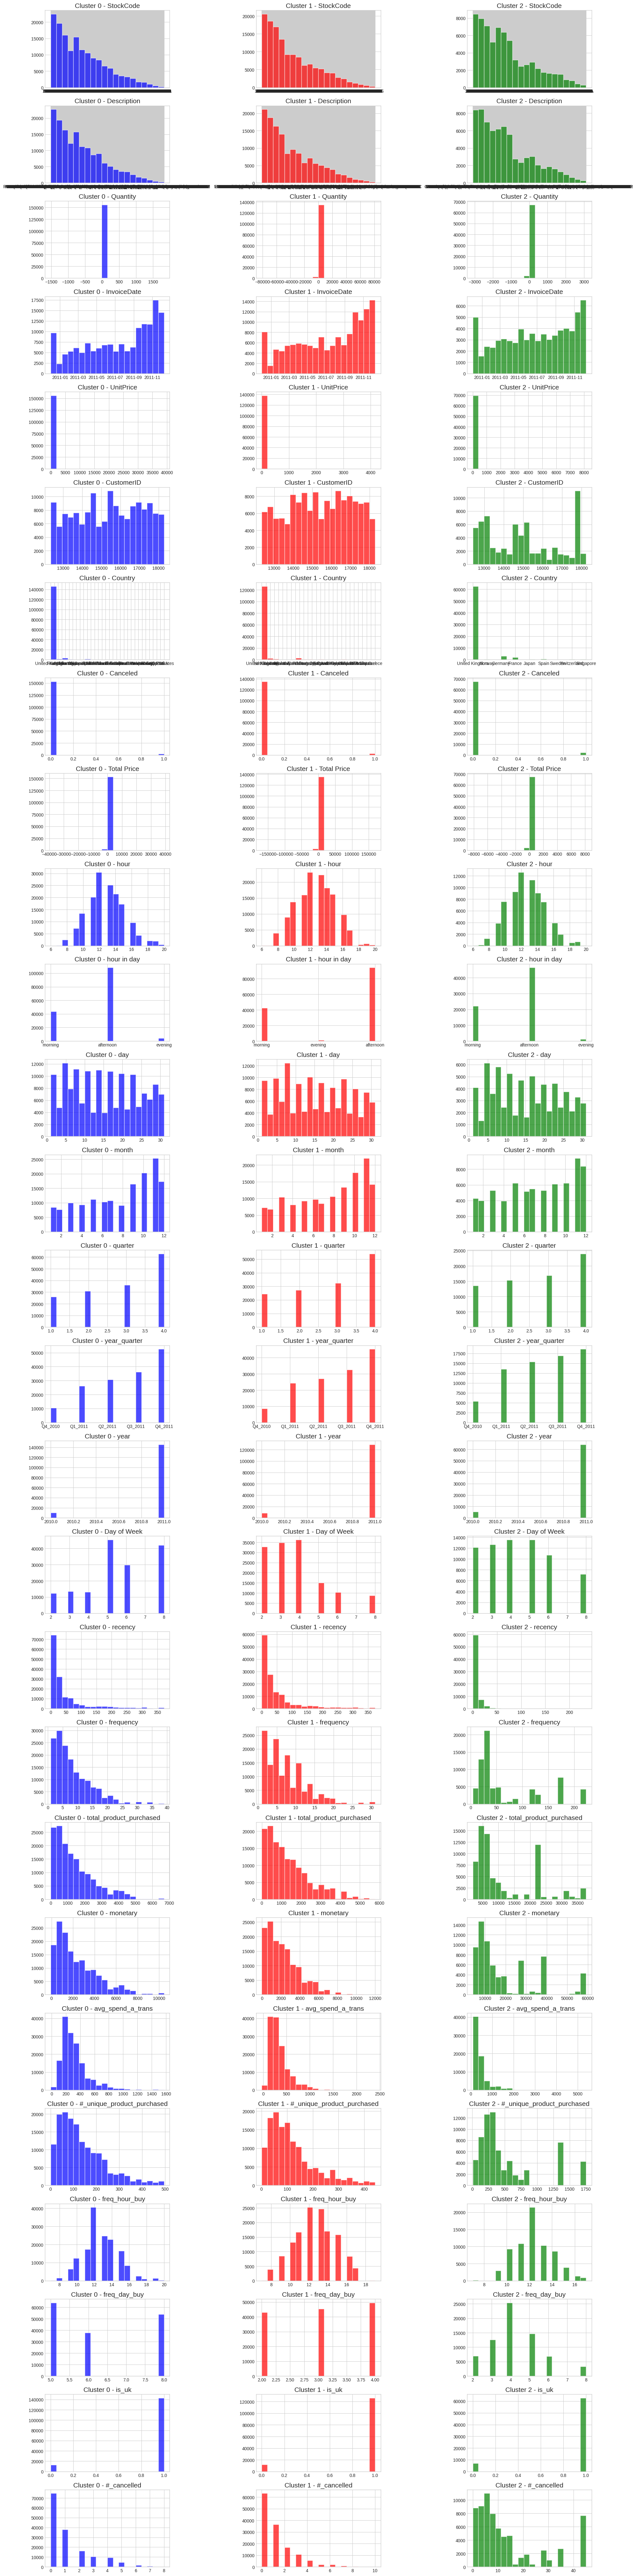

In [ ]:
features = df_all.columns[1:-1]
clusters = df_all['cluster'].unique()
clusters.sort()

# Setting up the subplots
n_rows = len(features)
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))

# Plotting histograms
for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = df_all[df_all['cluster'] == cluster][feature]
        axes[i, j].hist(data, bins=20, color=colors[j], edgecolor='w', alpha=0.7)
        axes[i, j].set_title(f'Cluster {cluster} - {feature}', fontsize=15)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')

# Adjusting layout to prevent overlapping
plt.tight_layout()
plt.show()